### Amazon Review Model

In [1]:
import json
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import nltk
import re
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Downloading the file and parsing it and storing in proper data frames.

In [2]:
def parse(path):
    g = open(path,'rb')
    for l in g:
        yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

automotive_data = getDF('Automotive_5.json')
automotive_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",I needed a set of jumper cables for my new car...,5.0,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011"
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]","These long cables work fine for my truck, but ...",4.0,Okay long cables,1315094400,"09 4, 2011"
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]",Can't comment much on these since they have no...,5.0,Looks and feels heavy Duty,1374710400,"07 25, 2013"
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]",I absolutley love Amazon!!! For the price of ...,5.0,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010"
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]",I purchased the 12' feet long cable set and th...,5.0,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012"


In [3]:
automotive_data.info

<bound method DataFrame.info of            reviewerID        asin                        reviewerName  \
0      A3F73SC1LY51OO  B00002243X                     Alan Montgomery   
1      A20S66SKYXULG2  B00002243X                            alphonse   
2      A2I8LFSN2IS5EO  B00002243X                               Chris   
3      A3GT2EWQSO45ZG  B00002243X                              DeusEx   
4      A3ESWJPAVRPWB4  B00002243X                        E. Hernandez   
...               ...         ...                                 ...   
20468  A1KB43BI085A48  B00KIAQ8VW                             Mike F.   
20469  A3HIUWKL4D853W  B00KIAQ8VW                                RayH   
20470  A1S95WASXJ02VX  B00KIAQ8VW                 Roberto Aguilar Jr.   
20471  A2IID0Z6EHF5KP  B00KIAQ8VW                              Soarer   
20472  A3HKZTFCPIK2OE  B00KIAQ8VW  SSG Barnes (ABN) "James C. Barnes"   

        helpful                                         reviewText  overall  \
0        [4,

In [4]:
# getting just helpful from helpful_list
vector = np.array(automotive_data['helpful'])

# converting vector array of helpful to an int value as the list contains both values which are same.
for i,j in enumerate(vector):
    j = j[0]
    vector[i] = j

try:
    del automotive_data["helpful"]
except:
    pass

automotive_data['helpful_list'] = vector.tolist()

automotive_data.head()


,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_list
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,I needed a set of jumper cables for my new car...,5.0,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011",4
1,A20S66SKYXULG2,B00002243X,alphonse,"These long cables work fine for my truck, but ...",4.0,Okay long cables,1315094400,"09 4, 2011",1
2,A2I8LFSN2IS5EO,B00002243X,Chris,Can't comment much on these since they have no...,5.0,Looks and feels heavy Duty,1374710400,"07 25, 2013",0
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,I absolutley love Amazon!!! For the price of ...,5.0,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010",19
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,I purchased the 12' feet long cable set and th...,5.0,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012",0


In [5]:
vector = np.array(automotive_data['overall'])

# converting vector array of helpful to an int value as the list contains both values which are same.
for i in range(len(vector)):
    if 1 <= vector[i] <=2:
        vector[i] = str(vector[i])
    elif vector[i] == 3:
        vector[i] = str(vector[i])
    else:
        vector[i] = str(vector[i])

automotive_data['overall'] = vector.tolist()

automotive_data.head()


,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_list
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,I needed a set of jumper cables for my new car...,5.0,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011",4
1,A20S66SKYXULG2,B00002243X,alphonse,"These long cables work fine for my truck, but ...",4.0,Okay long cables,1315094400,"09 4, 2011",1
2,A2I8LFSN2IS5EO,B00002243X,Chris,Can't comment much on these since they have no...,5.0,Looks and feels heavy Duty,1374710400,"07 25, 2013",0
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,I absolutley love Amazon!!! For the price of ...,5.0,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010",19
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,I purchased the 12' feet long cable set and th...,5.0,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012",0


In [6]:
# Converting overall review to sub categories for better regression
automotive_data["classes"] = automotive_data["overall"]
automotive_data["classes"].replace({5.0: "positive",4.0:"positive",3.0:"negative",2.0:"negative",1.0:"negative"}, inplace=True)
automotive_data.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_list,classes
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,I needed a set of jumper cables for my new car...,5.0,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011",4,positive
1,A20S66SKYXULG2,B00002243X,alphonse,"These long cables work fine for my truck, but ...",4.0,Okay long cables,1315094400,"09 4, 2011",1,positive
2,A2I8LFSN2IS5EO,B00002243X,Chris,Can't comment much on these since they have no...,5.0,Looks and feels heavy Duty,1374710400,"07 25, 2013",0,positive
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,I absolutley love Amazon!!! For the price of ...,5.0,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010",19,positive
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,I purchased the 12' feet long cable set and th...,5.0,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012",0,positive


#### Visualizing the data

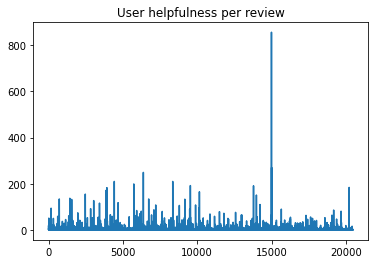

In [7]:
%matplotlib inline 
automotive_data["helpful_list"].plot()
plt.title("User helpfulness per review")
plt.show()

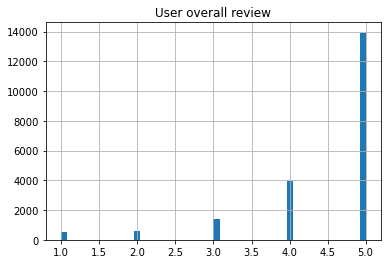

In [8]:
%matplotlib inline 
automotive_data['overall'].hist(bins=50)
plt.title("User overall review")
plt.show()

### Cleaning the data

In [9]:
# dropping uneccesary columns for the analysis
automotive_data = automotive_data.drop(labels=['asin','reviewerName', 'unixReviewTime','reviewTime'],axis=1)

In [10]:
print("Data after dropping the unnecessary columns")
print()
automotive_data.head()

Data after dropping the unnecessary columns



,reviewerID,reviewText,overall,summary,helpful_list,classes
0,A3F73SC1LY51OO,I needed a set of jumper cables for my new car...,5.0,Work Well - Should Have Bought Longer Ones,4,positive
1,A20S66SKYXULG2,"These long cables work fine for my truck, but ...",4.0,Okay long cables,1,positive
2,A2I8LFSN2IS5EO,Can't comment much on these since they have no...,5.0,Looks and feels heavy Duty,0,positive
3,A3GT2EWQSO45ZG,I absolutley love Amazon!!! For the price of ...,5.0,Excellent choice for Jumper Cables!!!,19,positive
4,A3ESWJPAVRPWB4,I purchased the 12' feet long cable set and th...,5.0,"Excellent, High Quality Starter Cables",0,positive


In [11]:
# dropping all NaN values from the column reviewText
print("Data after dropping the Null values")
print()
automotive_data = automotive_data.dropna(axis=0, subset=['reviewText'])
automotive_data.head()

Data after dropping the Null values



,reviewerID,reviewText,overall,summary,helpful_list,classes
0,A3F73SC1LY51OO,I needed a set of jumper cables for my new car...,5.0,Work Well - Should Have Bought Longer Ones,4,positive
1,A20S66SKYXULG2,"These long cables work fine for my truck, but ...",4.0,Okay long cables,1,positive
2,A2I8LFSN2IS5EO,Can't comment much on these since they have no...,5.0,Looks and feels heavy Duty,0,positive
3,A3GT2EWQSO45ZG,I absolutley love Amazon!!! For the price of ...,5.0,Excellent choice for Jumper Cables!!!,19,positive
4,A3ESWJPAVRPWB4,I purchased the 12' feet long cable set and th...,5.0,"Excellent, High Quality Starter Cables",0,positive


In [12]:
positive_data = automotive_data.loc[automotive_data['classes'] == 'positive']
positive_data = positive_data.iloc[:5000]
positive_data

,reviewerID,reviewText,overall,summary,helpful_list,classes
0,A3F73SC1LY51OO,I needed a set of jumper cables for my new car...,5.0,Work Well - Should Have Bought Longer Ones,4,positive
1,A20S66SKYXULG2,"These long cables work fine for my truck, but ...",4.0,Okay long cables,1,positive
2,A2I8LFSN2IS5EO,Can't comment much on these since they have no...,5.0,Looks and feels heavy Duty,0,positive
3,A3GT2EWQSO45ZG,I absolutley love Amazon!!! For the price of ...,5.0,Excellent choice for Jumper Cables!!!,19,positive
4,A3ESWJPAVRPWB4,I purchased the 12' feet long cable set and th...,5.0,"Excellent, High Quality Starter Cables",0,positive
...,...,...,...,...,...,...
5609,A31IR85J8P7DC0,Not to much i can add about a barrety tender i...,5.0,awesome,0,positive
5610,A2ERYYDRHH1XW9,I use it to charge my scooter and it works gre...,5.0,good,0,positive
5611,A33AEK6T00UR4X,We already owned two of these for our racing n...,5.0,A New Addition,0,positive
5612,A10NQKIG7NXUR7,I have been using two of these battery tenders...,5.0,Good little tendors,7,positive


In [13]:
automotive_data = automotive_data[automotive_data['classes'] != 'positive']
automotive_data

,reviewerID,reviewText,overall,summary,helpful_list,classes
16,A1KKOA3FP2DMBW,This product serves its purpose. I use it for ...,3.0,Does what I expected it to do.,0,negative
24,A2FJKITDY5UUHJ,"this product does what it is supposed to do, b...",3.0,average,3,negative
25,A3LYC4BXRDE5RZ,I would not buy this product again. It does wh...,2.0,Does what it is supposed to,3,negative
35,A1QF996642YT9L,Maybe I don't understand the finer points of k...,3.0,"cheaply made, picks up some dust but leaves be...",0,negative
47,A2YDD9A0U77LYS,Bought this for my 2013 Evo x gsr. It left red...,3.0,Leaves red lint. Good otherwise,0,negative
...,...,...,...,...,...,...
20460,A1EVV74UQYVKRY,I'm afraid I'm not sold on this. It does exact...,3.0,Does What it Promises but Size is a Limitation,1,negative
20462,A3A4ZAIBQWKOZS,I received a visor set free for review purpose...,3.0,"works, but has limitations you may not want to...",1,negative
20466,A1TEBSNK5A9XX9,"I honestly don't think it's worth $3, but for ...",3.0,It's ok fo the money?,0,negative
20467,A212UJA6XIOTUT,very thin material. not very warm at all.. bar...,2.0,ehhhh,0,negative


In [14]:
frames = [automotive_data, positive_data]
  
automotive_data = pd.concat(frames)
automotive_data

,reviewerID,reviewText,overall,summary,helpful_list,classes
16,A1KKOA3FP2DMBW,This product serves its purpose. I use it for ...,3.0,Does what I expected it to do.,0,negative
24,A2FJKITDY5UUHJ,"this product does what it is supposed to do, b...",3.0,average,3,negative
25,A3LYC4BXRDE5RZ,I would not buy this product again. It does wh...,2.0,Does what it is supposed to,3,negative
35,A1QF996642YT9L,Maybe I don't understand the finer points of k...,3.0,"cheaply made, picks up some dust but leaves be...",0,negative
47,A2YDD9A0U77LYS,Bought this for my 2013 Evo x gsr. It left red...,3.0,Leaves red lint. Good otherwise,0,negative
...,...,...,...,...,...,...
5609,A31IR85J8P7DC0,Not to much i can add about a barrety tender i...,5.0,awesome,0,positive
5610,A2ERYYDRHH1XW9,I use it to charge my scooter and it works gre...,5.0,good,0,positive
5611,A33AEK6T00UR4X,We already owned two of these for our racing n...,5.0,A New Addition,0,positive
5612,A10NQKIG7NXUR7,I have been using two of these battery tenders...,5.0,Good little tendors,7,positive


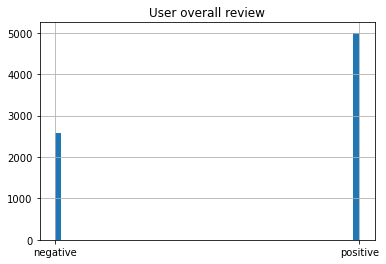

In [15]:
%matplotlib inline 
automotive_data['classes'].hist(bins=50)
plt.title("User overall review")
plt.show()

In [18]:
automotive_data['reviewText'][7]

'these are good enough to get most motorized vehicles up and running, for semi and farm equipment, get solid copper.'

In [19]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    '''
    This function removes the punctuation marks so that the data doesnot takes them into account.
    '''
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [20]:
automotive_data['reviewText']=automotive_data['reviewText'].apply(lambda x: remove_punctuation(x.lower()))

In [21]:
print("Data after removing the punctuation")
automotive_data['reviewText'][7]

Data after removing the punctuation


'these are good enough to get most motorized vehicles up and running for semi and farm equipment get solid copper'

In [22]:
stemmer = PorterStemmer()
# This code is taken from multiple sources and combined to get the desired output
# stop words are the words like "the, I, our etc"
words = stopwords.words("english") 
automotive_data['cleaned_reviews'] = automotive_data['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
print("Data after removing the stopping words")
automotive_data.head()

Data after removing the stopping words


,reviewerID,reviewText,overall,summary,helpful_list,classes,cleaned_reviews
16,A1KKOA3FP2DMBW,this product serves its purpose i use it for h...,3.0,Does what I expected it to do.,0,negative,product serv purpos use haul cano cabe would t...
24,A2FJKITDY5UUHJ,this product does what it is supposed to do bu...,3.0,average,3,negative,product suppos real happi qualiti construct
25,A3LYC4BXRDE5RZ,i would not buy this product again it does wha...,2.0,Does what it is supposed to,3,negative,would buy product would stick detal microfib t...
35,A1QF996642YT9L,maybe i dont understand the finer points of ke...,3.0,"cheaply made, picks up some dust but leaves be...",0,negative,mayb dont understand finer point keep car clea...
47,A2YDD9A0U77LYS,bought this for my 2013 evo x gsr it left red ...,3.0,Leaves red lint. Good otherwise,0,negative,bought evo x gsr left red lint dash use hous i...


In [26]:
automotive_data['cleaned_reviews'][7]

'good enough get motor vehicl run semi farm equip get solid copper'

In [24]:
del automotive_data['reviewerID']
del automotive_data['overall']
del automotive_data['summary']
del automotive_data['reviewText']
del automotive_data['helpful_list']

In [25]:
automotive_data.head()

,classes,cleaned_reviews
16,negative,product serv purpos use haul cano cabe would t...
24,negative,product suppos real happi qualiti construct
25,negative,would buy product would stick detal microfib t...
35,negative,mayb dont understand finer point keep car clea...
47,negative,bought evo x gsr left red lint dash use hous i...


In [22]:
# Making just the features list
features = automotive_data['cleaned_reviews'].tolist()

In [23]:
# Making the lables list
labels = automotive_data['classes'].tolist()

In [24]:
def rand_split_train_test(features, label, train_perc=.8, random_state=42):
    """
    Shuffle the features and labels so they are in a random order.
        sklearn.utils.shuffle does this well.
    Then split the features and labels into training and testing sets
        where train_perc of the samples are in training and the
        remaining are for testing.
    """
    #features_shuffles, label_shuffle = shuffle(features, label, random_state=42)
    test_size = 1 - train_perc
    features_tr, features_te, label_tr, label_te = train_test_split(features, label, 
                                                                     train_size=train_perc,
                                                                     shuffle=True,
                                                                     random_state=random_state,
                                                                     stratify=label)
    
    return features_tr, features_te, label_tr, label_te

In [25]:
def accuracy(pred, truth):
    """What Percentage of the predictions are correct?"""
    acc = accuracy_score(pred, truth)
    return acc

In [26]:
features_tr, features_te, label_tr, label_te = rand_split_train_test(features, labels)

In [27]:
print("The length of the traing set is", len(features_tr))
print("The length of the traing set is", len(features_te))

The length of the traing set is 6062
The length of the traing set is 1516


In [28]:
print("The number of features in current data is", len(automotive_data.columns))

The number of features in current data is 7


#### Making the model for the data

In [29]:
# # We are using CountVectorizer to convert text to a vector of number using the 
# # in-built library
# cv= CountVectorizer(binary=True,min_df = 10, max_df = 0.95)
# cv.fit_transform(features_tr)

# # Fitting the data
# train_feature_set=cv.transform(features_tr)
# test_feature_set=cv.transform(features_te)

In [30]:
# Converting into Tfid Transformer
# Tfidf_transformer = TfidfTransformer(use_idf=False)
# train_feature_set_tfid = Tfidf_transformer.fit_transform(train_feature_set)
# test_feature_set_tfid = Tfidf_transformer.fit_transform(test_feature_set)

In [31]:
percent_vector = [0.1,0.2,0.6,0.8,1]
train_data_features_set = []
train_data_label_set = []

In [32]:
number_of_data = len(features)
for i in range(len(percent_vector)):
    new_number = int(percent_vector[i] * number_of_data)
    new_feature = features_tr[0:new_number]
    train_data_features_set.append(new_feature)
    new_label = label_tr[0:new_number]
    train_data_label_set.append(new_label)

In [33]:
print(len(train_data_features_set[2]))

4546


#### Logistic Regression Model

In [34]:
logistic_test_result = []
logistic_test_pred = []
logistic_train_result = []
logistic_train_pred = []

In [35]:
for i in range(len(train_data_features_set)):
    logistic_regression_pipeline = Pipeline([("tfid", TfidfTransformer()), 
                                ("logreg", LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=400, 
                                                              class_weight='balanced'))])
    
    logistic_regression_pipeline.fit(train_data_features_set[i], train_data_label_set[i])
    
    predicted_test_logistic_regression = logistic_regression_pipeline.predict(features_te)
    logistic_test_pred.append(predicted_test_logistic_regression)
    
    predicted_train_logistic_regression = logistic_regression_pipeline.predict(train_data_features_set[i])
    logistic_train_pred.append(predicted_train_logistic_regression)
    
    test_acc_log = accuracy_score(label_te, predicted_test_logistic_regression)
    logistic_test_result.append(test_acc_log)
    
    train_acc_log = accuracy_score(train_data_label_set[i], predicted_train_logistic_regression)
    logistic_train_result.append(train_acc_log)

ValueError: Expected 2D array, got 1D array instead:
array=['bought year ago last year perhap use everi monthssav money shop around via internet reliabl compressor eg camphau other'
 'fit perfectli hhrthe price half local part store want first time replac man overdu felt side seal edg almost ident origin'
 'fortun read review order size larger still tight fitleath okbut seam insid uncomfortablei suggest spend anoth twenti dollar get better glove'
 'use kit lot easier expect result pretti amaz definit bit mess well worth honestli think took long mask headlight blue painter tape took headlight sand buf sandpap handl couldv better mine broke apart done first sand stage make sure appli uv protect month headlight plastic mostlik start suffer againedit sinc origin review headlight back old yellowi gross appear method applic uv protect id say overal likenew appear last two month letdown'
 'wax okay easi applic remov overal result good howev would prefer good carnauba wax good wax meguiar mother much less expens last much longer product agre mani peopl car wash two need reappli disappoint'
 'recent put pace carfirst use foam gun get loos dirt initi impress nice cover car nice sudsi coat super sudsi budget car wash liquid smell like bubbl gum howev sud disappear quickli almost quickli made bit worri move hand washpour bucket fill water expect lot sud seem die quickli rins soap dri car though car wash liquid realli shine bad pun badin sun paint deep reflect look consider cleaner look like whole new depth ad paint come frommeguiar wash wax oz car wash liquid take cake final finish clean abil howev think meguiar take trophi home best smell sud longest last sud mother left awesom finish kept water spot away dri bubblegum smell nearli nonexist sud worri firsti would consid mother california gold nice start fullon diy detail job even quick light detail job give nice base work seem clean dirt effect meguiar test clay bar leav nice smooth finish give bit peaceofmindhowev short time would rather give quick wash consid meguiar itll give onetwo combo wash that ever slightli less shini coat light waxsum good smell like bubbl gum leav deep finish whole new depth especi darker color keep water spot form dri clean abil awesom notsogood sud bit disappoint scent isnt defin notic rins offrecommend'
 'work well lexu es good afford atern oem dont like nut spotweld six tini weld wrench part hold would rather see continuo bead weld two part meet'
 'work well want keep track tire wear concern realli calibr right money keep mind offset'
 'detail car luxuri car dealership use mani differ car wax lifetim best paint protect use remov trim easili also easi appli done three coat honda accord hybrid far look great product buy opinion better dealership dollar applic xylon wife honda odyssey make sure clean vehicl pre cleaner hand check feel bump dirt road grim applic easi wipe well quicker hand wax'
 'appear need excel productbrought name brand product fit interchang properlythank much'
 'motorcycl car year keep batteri sulphat big problem everi day driver technolog batteri tender plu exactli need batteri classic car well harley like much bought batteri tender plu unit two brother keep batteri aliv motorcycl great product hope abl save buck replac batteri often mention hop harley take moment notic plan use boat marin batteri may order model abl keep multipl batteri aliv time'
 'kn filter car need recharg kit clean keep car run smooth kit work great look forward keep air filter clean kit'
 'gave star great gentl one protect perform promis would hesit get one thing sure want star product get klass sealantprotect silver jug fantast go get one klass product would sealant mention silver bottl red bottl come one step behind good'
 'work advertis dont anyth particularli special best part toss your done lint unlik paper towel work great leav interior surfac clean without residu lint look realli bad embarrass product clean without oil gloss left that great dislik greasi finish reflect badli sun need make sure keep store indoor sun els could dri youi would suggest buy theyr discount subscrib save maxim save'
 'got yellow give fog light vintag european look got exact perfect color pleas vinyl film buy perfect amber color cheap china lemon yellow film reduc light output pain appli still need coat get tint want appli coat one hour accord instruct must wait day add coat oven go low cure paint minut oven appli coat doesnt smell bad end got tire tri go heavi paint good run use grit sand paper fix bad still put coat duplicolor clear wheel paint extra protect know fog car guess want memori youth fog ligh amber like alway'
 'worksi need oneit cheapit jobi may never need dont forc doubl thread thing other appar intellig stihl concret saw back jobi win anoth onei probabl loos due predat etc need correct careless plug screw may come way'
 'ram pickup spend entir life outsid park near tree hadnt done much paint care coupl year one side cover small hard brown tree sap spot read review amazon websit clay bar use clean paint surfac thought id tri mother kit revit paint job sceptic abil anyth final fine clean rightth clay bar could remov hard tree sap mark remov scratch actual appli keep clay lubric make paint seem smoother touch cannot tell differ final normal wax polish surfac clay wax polish surfac surfac feel unpolish paint vs clay paint exhibit notic benefit clay maker claim howev appli good polish achiev result wash clean paint surfac opinion even truck clean first clay stay pretti clean whole vehicl paint surfac clay feel faintli gritti appear slightli darker color readi trashingto remov sap resort rag soak miner spirit plenti elbow greas elimin light scratch use tcut clay follow polish turtl wax day shoulder ach bad truck paintwork look good well good year old wellus stonechip scratch truck clearcoat actual held exceedingli well yearsi havent tri clay year old garag minivan yet interest see remov minor swirl mark dont expect make paint look shinier polish look great isi buy extra bottl detail spray bought kit local autozon case one wasnt enough one enough one clay bar one vehicl treatment sinc two clay bar kit extra bottl use second bari found clay easi quit quick split bar two press flat disc diamet spray surfac rub clay back forth paint palm knead regularli back disc get thinner split actual straightforward big deal avoid rubber part like windshield surround clay pick black soot make sure polish dri spray leav streak dont remov suppli tow suggest clay bar realli guy gal want ultim care newer vehicl may notic anyon els satisfact job well done alway matter perfectionist know co onesept updat even tri clay half hood minivan wax see could tell differ clearcoat van great condit wash hood dri clay left half lh seat van notic even plenti spray lubric faint straight line light scratch visibl clearcoat wipe surfac dri werent clay could feel real differ surfac smooth clay unclay side clay appear visibl dirt turtl waxd whole hood straight line scratch gone visual differ clay unclay even reflect overhead flouresc light garag guid appli dri finger tip hood left hand unclay side right hand clay side appli light pressur slide back forth think detect slight reduct friction finger chang direct clay side even swap hand result seem rule differ finger tip howev effect slight almost imperceptibleconclus clay may help contamin paint surfac remov last littl imperfect reviv paint clean regularlywax paint surfac clay probabl isnt worth cost effort'
 'foam isnt tight hous hard time get pole slide shaft like store take littl space vehicl im fenc go keep'
 'work great civic hybrid code coupl thousand mile easi isntal right tool took minut'
 'came time good conditionbought plug new gener gap put storag till time chang outngk plug come littl cardboard tube protector around busi end keep get hammer think nice touch'
 'use quick touch up like bird leav present ride dont alway time hand wash help prolong time mechan car wash cost cheaper bm store'
 'plew lub hand pump work fine refil dual pump fluid honda crv must servic everi mile'
 'need one say lock place use small lock put tighten head lock includ place wheel tandem axl trailer there way trailer move cool'
 'star get pay highli recommend understand downfallsprosfit bulb automot socket littl tight preferlead wrap fulli around termin mean dont rebend termin socket doesnt matchbulb bright margin brighter oe incandescentsinst respons voltag unlik delay experienc oe bulbsconsterr packag loos small manila envelop ship chinaqu control par china crap standard sever led assembl fulli socket base easi fix appli light pressur snug innot led bulb doesnt light first instal tri instal way around led requir posit neg lead correct order work'
 'would definit recommend anybodi look clean finish definit worth price hard work'
 'one receiv broke first torqu adjust went base ft lb made grind sound lock got move backward tri luck immedi sent back defect'
 'toyota sienna k mile recent got engin check light cel code p catalyt convert new cat expens gave crc tri put bottl crc ga follow instruct also reset cel use obd ii scannerth resultth smog number cohco improv enough pass california smog check'
 'im use secur spare tire util trailer nice thick cabl long like bicycl cabl lock tubular lock favorit overal devic seem like pretti good deterr casual thief notic ring one end cabl drill way center mayb best qualiti control see pic post im pretti happi overal would recommend without hesit'
 'work well hard appli work done get readi spend even time clean car clay overal work cant complain remov contamin good price fairse review meguiar productsrecommend'
 'wonder jay leno seriou car restor use stuff work depend car your work disassembl could take time worth get bulk pack way go much cheaper long runi put escort zx made huge differ like ear stuf werent hood door floor trunk actual instal breez cut util knife remov back put roll roller kind make sure gripsfor tricki shape use paper cardboard templat even make mistak cut hardli matter cut big cut away cut small add morethi job ten degre outsid wait till spring summer dynamat easier work'
 'first let start state unbia review purchas product amazon unlik mani amazon vine product reviewersb automot technician engin background life recommend product gener consum make mistak other claim build qualiti item great asid rest review one aspect havent seen cover must addressedth output voltag way high automot instal applic instal solar array decid take read see kind output receiv finish installfirst sunni day april degre locat tnvoltag v direct sunlightamper v system recharg voltag rang v via altern batteri charger hook devic v output even low amp caus batteri overcharg ecu throw overvoltag check engin code even wors fri ecudevic lawn mower troll motor four wheeler tractor etc may use monitor batteri voltag may better suit use although would recommend charg even batteri high voltag'
 'order awar prig understand sea foam much better stabil good prig prig much concentr therefor repres better valu order futur'
 'calip look amaz easi use appli coat still paint left check photo'
 'filter combin airaid mrt help taho make littl power sound like v hood filter fit nice provid plenti filtrat daili driver'
 'bought review said clean water pressur wash found restrict flow much fault buy non recommend applic hard water spigot unfilt well put use hand water plant work ok lower flow big deal fill plant water jug gave four thought much slow flow everi time util take get consist flow normal rate well spec requir flow pressur belief could issu proper applic also make note pressur regul suggest rving know pressur system one connect know need one hose burst good hose cheap either us older individu know worth good one bend coil easili weather note flow improv use rather quickli get air pocket work well worth tri pressur washer comment later buy second one tri one buy flexibl extens'
 'armoral miracl worker tire dri old upholsteri clean seal protect cover scratch make leather vinyl look new ive use sinc earli highli recommend use seat dash inner door even tire sidewal ive also use leather vinyl purs offic chair leather book coversjust spray let soak wipe well buff doesnt leav oili residu odor dont use place would slip hazard like floor leav slipperi finishtri armoral youll amaz great car seat look'
 'nice addit car bolt directli insid driver side door easili found'
 'ive origin new style nest rhino rampssinc move concret origin easili drive given low lip end ramp ye drove origin took chunk end ramp land rocker panel pinch weld sold origin bought new style one hope would betterthey end ramp split nest two three usesth right wheel spun toyota corolla melt surfac one rampth race pamp three tome price perfect dump purchas insteadal rate star amazon basic one time get pay'
 'use kn filter servic kit year best way save money air filter buy soon get car never need anoth filter'
 'three work fine keep trunk car tire repair kit littl noisi rattl around bit inflat job'
 'simplic design make invalu highli versatil rather buy complic higher price dedic pump specif task pump abl clean easili move next job may want purchas plan fill supercharg v engin oil differenti pump oil perfect fill remov make flush much simplersometim complic design call simplest tool work simpl tool exactli intend noth noth less'
 'ticket tow gvwr trailer even though would prefer longer shank work fine need find pound extens'
 'foglight bracket broke foglight need reseat front spoiler use stuff hour lock tight stuff work'
 'theacdelco acd clear vision wiper blade wear indic pack difficult instal familiar blade instal need instruct best wiper blade arriv sever adaptor none need store blade replac later year wear indic cannot comment new blade understand new product acdelco clear windshield requir isnt sleek style price point higher mani suspect that wear indic sinc chang blade maximum annual wast car wear wiper need remind assum realli give visual clue perhap great blade car price bad blade outstand blade'
 'say air filter car fit came box nuff said'
 'tri find cabin air filter qualiti anywher near price sold amazon replac easi glove compart honda owner manual show'
 'use one year way better armor grew withleav residu look clean seem leav crusti appear long summer dark charcoal color might'
 'easi instal th day self tap bolt came outstrip frame adjust recommend never back turn tightli felt help like pay weld place lost one pin three bolt would probabl buy rees equal hitch antisway next time eaz type'
 'like simpl product appli notic machin partial paint wheel dri visibl requir lot elbow greas rub complet perfect finish dont like overwork product car lazi aggress rub anyth risk scratch didnt even finish use product threw left awaynb complet work leav wheel bead work product finish right first time without extra labor requir'
 'great cleaner last wheel pricey get two car wash product'
 'use year doubl axl toy hauler past use good old wood plank cut x took lot space decid give tri feel must design wrap patent hard anoth compani provid competit look camco decid due peopl report failingcrushingproslight weight adjustableeasi stackingconspric set isnt enough doubl axl trailerth carri bag suck stitch unravel coupl area zipper teeth wont stay lock togeth gave bag toss garbag'
 'awesom microbfib towel wish tag attach leav mark let contact surfac car'
 'leather seat car stuff want use give silki smooth feel nice luster easi appli overwhelm odor like leather product either make seat smell way new guess best descript would new car smell far use leather item im sure would work great youd take account car smell sure youd want leather coat smell like car neg quibbl size bottl huge last year would nice offer smaller size might one couldnt find'
 'sinc support jack corner trailer recommend level camper must havent use yet seem well abl level less level camp site put behind trailer wheel low side back onto check level adjust need level lower support jack'
 'thia say lb capac mayb right main support otherwis balanc load well use strap help support outboard corner kept useful thing heavi item'
 'outstand light instal mg td fit fine night drive safer use dorman socket wire ground chassi rather bucket couldnt happier result great light'
 'would nice light way around instead one side therefor seen one direct bright regular flare guess would better noth emerg'
 'first batch came crack broken tab exchang replac piec arriv new condit instal breez like look give replac order would also come broken piec might like look homemad solut'
 'product serv purpos use haul cano cabe would time could made sloppi dont secur ratchet strap side back truck work good though go short distanc moder speed'
 'aftermarket replac idler pulley fit work give extra star sinc metal pulley instead plastic oem'
 'well made like quick disconnect har come unit bring batteri full charg switch mainten level'
 'man hard come titl mix reviewit work metal strong rustresist grade rustproof stainless alreadi spot roadsalt given narrow space fit difficult get lock end hard get good grip even knurl end end small enough there interfer hardwar hitch truck wide enough outsid there almost endplay lock shaft make get end even difficult take get use dont think there better product though make worth price'
 'unit held well month charg well light inform display'
 'meguir done product complet awesom easi appli remov add incred deep tone luster vehicl finish wont disappoint result'
 'possibl solut tightcoupl problem use caterpillar greas gun pri fit like gun also heavi duti industri gun like lincoln like heavi duti limit much forc need appli free coupler greas fit doityourself dremel dremel make small coneshap redston bit head mm wide base long dont know item number tini magnifi floresc work lamp lightli ground three crescentshap springload clamp grab greas fit care maintain origin contour took two minut id lightli graze three clamp test connect left coupler littl tight allow futur wear greas gun top qualiti twominut modif custom tool guy like custom car motorcycl gun tool need tough pistolgrip greas gun access tight place nearli imposs oper leveract gun work good luck'
 'buy anoth set wheel tri one set first see pleas resultsc imagin pay time much heavier metal version'
 'order discov wouldnt hold read hit releas button allow air adjust qualiti seem okay receiv water fill version learn qualiti seem accur compar gaug'
 'lexol best sray clean leather seat automobil keep crack summer winter month keepingb moist pliabl softso tell friend lexol keep vehicl cleanthank amazoncomal best'
 'first thing first dont use brush give start shed hair get calip use knew ahead time sure use standard painter brush thin medium sizei went black calip clean vw jetta light coat start got point smear enamel like ice sure got full effect want result also help bake hair dryer coat ensur dri adher betteralway lay trash bag news paper target calip otherwis enamel adher garag floor driveway get hand run hot water dawn enamel turn flake come right calip cleaner may may enough depend age car worn calip sure buy anoth feel need'
 'great product love use thisbut huge price increas almost doubledi use product side window well work good rainex realli make water bead realli goodi realli recommend product go current doubl get cheaper local storesmi last order product either arriv damag leak place undeliver damag still wait month amazoncom address spent buy stuff amazoncom yet spend penni amazoncom cuz amazon want address purchas'
 'keep contact clean lubric howev match pair vehicl trailer'
 'tower consid tall come work retriev item bed x truck came nice carri case store well behind front seat truck without scratch anyth put front tire tri fit work well'
 'bought charger replac old one last year use least twice week shop new one way half one hope last long great charger thing miss automat shut batteri complet charg cost old shop charger take far good'
 'see one left review one may order order jk fit circumfer steer wheel right assum thick steerng wheel chang cover steer wheel correctli front back remov return'
 'pop seal easili long handl give lot leverag lisl tool good qualiti mechan tool last'
 'saw glove nice thick leather thought would last right glove less month alreadi tear stress thumb baseluckili problem still use year'
 'love product work great howev problem detail spray bare enough midsiz sedan said work great would given star twice much detail spray'
 'make sure surfac clean possibl clean pad often possibl use use compress air pad brushthes pad like get dirti like overheat ive sever pad liter go poof griot da polish center disintegr foam goe everywher sinc switch lake countri pad found much durabl versatilethes good beginn pad figur whole da polish thing work upgrad better pad'
 'arent best cabl buy youll go electr weld suppli compani pay probabl time cost unless plan start tow servic need cabl see daili use id say gonna work youupdat compair ga cabl bought month back car dont realli seem much thicker that said much heavier individu strand thicker gaug model im guess that thick isnt much morewhat likelength bought halfton pickup never fail batteri fail start engin park pack lot car side rather push ton vehicl pull booster vehicl close let length work youheft cabl joke workhors grade cabl let plenti energi flow tri start l v that kinda importantsolid clamp unlik review dont problem open parrot clamp one hand hardli weak theyll clamp solid stay putupd realli need ga booster cabl skeptic deka make set ga cabl around person exper littl deka name seem pretti goodwhat dont likestiff theyr flexibl hope flexibl expect true weld cabl ga per foot per cabl that best jumper cabl cost still hope littl thinner strand promot flexibiltyc clamp like review mention cabl doesnt go way copper contact connect jaw instead screw bodi clamp copper jaw also screw bodi still fine im sureso buy cabl arent overkil ive argument peopl ga cheapi start truck fine well attempt addess number term gaug decreas ammount conductor increas word ga perhap conductor ga doesnt automat equat twice much power certainli allow power flow safe arent awar im electr engin resist enemi electr circut resist translat heat way friction two physic surfac rub togeth five basic factor contribut resist give curcuit determin appropri line size ambient temperatur conductor line distanc voltag amperag ambient temp control hot bad assum worst mean bigger cabl overcom additon resist heat produc conductor copper that good want pure least high puriti mix copper type conductor distanc voltag one cabl strength also happen weak total run length circut pretti long low voltag system like vdc higher voltag longer run given gaug wire without encount much voltag drop vdc drop voltag circuit real short distanc heaiver gaug line need prevent amperag also big consider amp load pull resist circut gener basic small wire larg load gener lot heat one two thing happen wire melt andor catch fire load tri power wont work make mistak start even small engin take lot energi bring togeth larg load low voltag dont want make lower long distanc run mean wan heaviest cabl find address orign question statment ga cabl might start smallblock fine want need extra length need consid heavi gaug cabl said ive person seen light duti cabl melt smoke start engin big themar right run close shippeddo actaulli need coleman ga booster cabl offic train real size chart packag would say ga fine length engin liter honestli probabl l well anyth bigger consid someth even betteralso protect invest buy cabl bag keep neat protect also keep twist tie came keep organ insid bag arsen cabl organ work great rememb clean inspect cabl use prolong life keep safe'
 'finish first spring wash fellow walk car ask crv waswash told almost year old could believ admit car look like due wonder mother product elbow greasemoth carnauba wax one weapon keep car look goodi start wash car dont dri time water drop remov step clay car remov embed spec stuck dirt year rubber mark clear snowmoth california gold clay bar paint save system dont clay everi inch entir car examin car sight imperfect run hand paint feel tini bump feel gritti see dirt paint gener spray section mother showtim instant detail knead piec clay hand rub spot identifi normal see dirt disappear swipe sometim need reappli detail repeat knead import want work littl piec dirt clay leav surfac clay ball scratch car also use clay nonpaint area glass chrome stainsaft clay step wax car small section use carnauba wax easi work put small section side car done section exampl time done spread readi wipe dont wait use micro fiber towel wipe wax use fresh piec fiber sectiona final step appli backtoblackmoth backtoblack ozto nonpaint surfac turn dull plastic shini new look surfac backtoblack also effect remov wax might accid got plastic that backtoblack last stepcarnauba wax give superior shine easi pleasant work highli recommend'
 'good enough ive mower stutter idl pour littl tank smooth almost right away'
 'bought deep fear car fall top im underneath although still major fear thing help eas quit bit thick sturdi build qualiti bar thing lock place heavi duti stand'
 'clever item add clean look licens plate frame hide screw head give finish look licens plate instal plan keep hand wish thought'
 'arriv quickli without leak box b audi saab love power steer fluid need quick check advanc auto part expect pay littl'
 'use mother brand jeep need good plastic polish jeep plastic window product jeep keep window clear scratch free'
 'bought emerg power fail light big box store sever year ago recent quit work trace problem batteri small v lead acid instead spend new light bought batteri amazon point amazon visa card free new one fit perfectli light work home light power fail thank amazon'
 'use lexol leather condition leather seat car leather furnitur make leather soft pliabl'
 'two gram bar packag enough clay bar cut halv use halv without problemwat hard make notic differ hard ground water like advic spend extra buck wash clay car self car wash water soften deionizedoth wise reap full benefit clay car grind paint microscop miner depositsus water lubric leav soap paint use sud lubric chemic soap quickli break clay bar find clay disintergr car wash reli soap lubric'
 'snap instal easili transfer one vehicl anoth couldnt believ inform get car comput system'
 'troubl connect unit sometim work right away sometim connect absolut fantast check mani aspect engin help troubleshoot problem check clear engin code'
 'seen type dual check tire inflat gaug mani servic station air chang gaug read pressur get tire check tire rv build gaug get read constantli put air tire go main tool rv'
 'normal use smaller recharg kit white bottl sinc ran bought spray bigger oil match use kn filter never clean unlik white bottl cleaner complet remov oil hard say im satisfi need test filter clean see filter sure exact formula white bottl well could updat clean older filter clean white recharg kit wont sinc dont see altern imagin option regular non synthet kn filter cleaner get hand white bottl cleaner work great vouch case problem could filter bought white recharg kit know clean filter time tell'
 'love stuff use year purchas new car appli polym coat hour easi hand buff leav deep slipperi shine car must follow direct put includ make sure paint good shape temperatur put sunlight also direct tell let polym curebind paintclear coat hour import good long last shine product fluff say polym coat last six month month limit arizona sun'
 'filter work well real plu side kn hex head make filter remov real snap'
 'stuff stick work well downsid hard remov hand best use clear thin glove appli'
 'great quick refer picki want rv perfect spend money big version see rv dealer use doubl side tape attach mine close enough'
 'receiv coverhav tri put yet appear qualiti product advertisedwil write anoth review use deliv promis'
 'must tool chest protect part like take lot water snow salt'
 'great product work well howev manufactur limit packag da dual action sanderbuff call said appli cut pad finish pad said use pad da buffer said hold problem porterc da'
 'despit neg review duster work surprisingli well sever duster pick dust best one havepro nice shape sharp tip go corner easi hold doesnt caus fatigu light catch lot dust mine doesnt leav lint behind dont know review perhap didnt whack lint new feather like duster well dont like handl bend one run anywher push place handl doesnt bendin fact work well take use insid hous pick enough dust take outsid whack anoth similar duster surpris much dust fli outanyway experi work well wish id bought one work well use comput screen well blind tabl top'
 'got chang oil honda odyssey made job chang oil easi abl get nearli quart oil coupl minut spill also multi purpos good valu money paid'
 'kind hard review product youv never realli use seem made well base option mount hammer stay tightli base still easi remov tooth pictur make look decept big though theyr actual fairli small six inch'
 'compar ultra bulb base silverstar preced base blue pak silverstar much better light imho actual went back base silverstar appear superior illumin road experienc honda civic hb focu bulb h design felt bit scam newer ultra offer realli true mo top life car wouldnt withoutbil h pacif northwest rain countri'
 'experi jb weld made two part part liquid steel part harden like strong epoxi combin two product work recommend use clean dispos contain use sour cream contain wash firstth first thing go want make jb weld mix prep surfac applic recommend use aceton paint thinner clean surfac leav petroleum film sinc didnt either use carburetorchok cleanersinc surfac alreadi rough didnt rough howev keep mind plan appli jb weld smooth surfac also rough surfac use fine grit sand paper second prepar step began appli jb weld cheap painter brush dollar store appli thick compound evenli entir area mesh rimthen use piec wood one side rim cclamp clamp piec rim pressur left hour hour jb weld cure remov cclamp reveal strong bond tri move piec back fourth wouldnt budg weld like beth nice thing jb weld sand ground paint cure notic jb weld bloop edg instal piec use dremel debur tool manag grind flush rimi also use product seal ga leak tiller carburetor bowl actual advertis seal leak ga leak carb nowconclus would believ product could actual weld metal togeth believ dont welder kit weld knowledg jb weld opinion best product get jam understand product good even mechan admit use'
 'batteri dead dead dead appar park month without use clock alarm slowli kill batteri thing brought back side short time pleas'
 'realli appreci rain x light drizzl mist water seem dispers minim windshield wiper use appli cold weather though help prevent ice stick windshield great also like use product back window doesnt wiper keep window clearer follow directionslet dri light haze wipe microfib paper towel windshield clear im sure youll like'
 'plug definit deliv fuel economi report use standard plug get km per litr fuel brisban sydney exactli drive condit use octan fuel got km impress car hyundai elantra km clocki go wait till plug due reach thier maxiumum life expect current sit km ping burnt corrod plug yet found could buy amazon ship australia less shelv per plug peac mind im go chang earli donc shop onlin amazon save bucket load lt th april im still make money read editi love onlin shop cant wipe smile face hahaedit ive claim get extra km per tank highway per litr ive convert thing imperi anoth amazon user claim mile per gallon save fuel work use car exampleand found would get km extra howev definit get consist kilomet use spark plug im statist nutter keep record fuel effici consumpt ever instal new part enjoy investig thing input figur km car highway fuel effici litr per km save litr fuel plug gallon octan fuel australia averag per litr wish fuel cheap like state per litr per week im save plug cost ea use take week highway drive recoup cost perhap week factor cost ship best part start make money lifespan plug least km week km highway drive leav anoth week go x could complain clearli win win folk'
 'use use pennzoil ultra advanc synthet motor oil mobil switch oil work perfectli fine car run great start hear royal purpl peopl tell amaz oil work wonder thought synthet oil good get tri royal purplethi best oil ive tri yet far havent tri am oil red line im stick royal purpl great idl torqu power wheel engin overal perform excel oil perform royal purpl go buy'
 'test use optimum rinseless wash bmw wrx bmw filthi dirt trace salt drive rain use bucket system one rins bucket one wash bucket gallon water oz product instruct car time dri section wash cobra waffl towel work wonder dri car one towel end day wrung five timesmi dri towel stay pretti clean process small area due careless part didnt scratch mar surfac dri streak free id advis use one towel per vehicl dri also took washer well didnt fray use low heat dryer set id highli recommend anyon seriou take care finish cari know peopl say alway blot dri use swipe motion experi that true use cotton terri cloth type fabric car surfac clean wipe lightli well wax car use fine clean microfib towel scratch clear coat believ case terri cloth cotton product use high qualiti microfib protect clear coat trap small particl fabric keep rub surfac realli concern advis use leaf blower dri car touch that safest way dri weather permit opinion reason justifi spend money qualiti towel save time wipe go take time blot car dri may well save money buy terri cotton towel two cent'
 'x x dont make mistak thing tini check dimens nearli would think would size wrong fault read advertis bathroom trash way worth buck'
 'cant find oil filter autozon pepboy napa found amazon piec bought dont waist time look town suppli'
 'initi car wash use quick detail spray lot clay bar remov stain bird drop wouldnt come car alon first time use amaz leav car feel smooth even pleasant smell'
 'bad bar seem littl long kind like master lock version better'
 'new articl consum report test result well simpli give whiter light distanc wise realli dont help see fartherthey burn lot hotter worri melt socket plug back mine seem bit distort remov minethey last year dont drive half much peopl better bulb like phillip extrem power put one burn seem lot better know bulb easi chang road keep cheap spare pair bulb glove compart case mayb ok wont buy particular bulb anymor would rather get cheap phillip dollar per bulb onebut car bulb hard chang idea chang bulb better get regular light bulb last year dont chang'
 'useful stand camco remov cartridg water filter work ok support filter use could better longer leg adjust cross brace would help would third foot lot campground go tall spigot filter end sit angl stand'
 'ive use invis glass sever year shop local auto part store ask clerk recommend good auto glass cleaner one clean well doesnt leav streak walk back hand said littl expens work wonder sinc use noth els even home sinc cleaner built water repel use exterior glass follow simpl direct ta taaaa sparkl clean glass exterior water shed right seem stay cleaner longer'
 'use filter almost year replac next week realli dont know tell use go replac everi year find someth differ said attest illnesss bad tast smell water weve hook park water suppli rv resort overnight space far everyth fine'
 'nice solid hitch lock rubber cover lock fit tight great job keep mud water'
 'helmet larg howev unit run small size set high head could use extralarg size'
 'second time put old car honda accord improv shiftli slight faster feel torqu better pass take long car pick feel better pull final send car mechan valv tune havent done tune mile let check better return shall keep post one interest thank'
 'use anoth brand point clay would consist fall apart meguiar clay held togeth abl use way less car qd spray perfect lubric use clay smell good'
 'sturdi easi drive dirt cement gravel slide backward snow carri larg nail keep place snow quit larg bare fit storag compart cut handl back get fit'
 'whistl work sometim whistl use coupl time year expedit econom'
 'follow instruct letter headlight look product work'
 'mile realiz leak sv investig ore dri rot tell long thing sat shelf sent guess problem could happen buy local store nonetheless frustrat'
 'work well cost would recommend attach rope allow easier remov wheel'
 'product look real nice larger expect flang lip cover perimet receiv openingi two issu slip part keep receiv stretch around open fit curt receiv catch safeti chain ring receiv tri instal pin wire har holder extra rubber gave troubl could rotat like look orient hing top extra rubber top hing real tight fit rdx actual push rear trim placei realli want clean look textur real close car trim logo end cut hing instal look great wish cut could buy plain rubber cap without extra retain'
 'give three star two reason first close posit rattl like rattlesnak scooter second clasp bit low hit bump scooter coffe spill oz mug'
 'split first time use ball save money find anoth manufactur ball cover need'
 'thing mess water coolant pump reason due addit corrod aluminum part replac mu thermostat water pump jeep grand cheroke royal purpl claim addit compat coolant includ mopar gmcetc dont think experienc strongli suggest dont use product plu make differ cool although f thermostat look better cool go way upgrad radiat differ thermostat rather cheap product damag coolant system'
 'im profession car detail wax car good year understand step hand wax product onto car difficult polish soft terri cloth odd reason wax leav residu even though tri buff fresh cloth buf car come expect surfac feel like wax fact felt like wash car im think product need appli use orbit buffer requir even pressur throughout follow review tri use buffer'
 'rainx make terribl wiper dont need put enough ontip dont put side window unless want rainwat rush car whenev crack open'
 'sea foam best truck mile run rough use two bottl two fill row seem help lot truck run smoother ga mileag better mpg find walmart bottl work'
 'great rattl paint product easi use work like primer paint easi applic forgiv might think get littl heavi hand clean prep paint transmiss pan truck let sit overnight instal back truck look great give nice dark purpl offset black use two reason transmiss get pretti hot enough im sure regular paint would last also exhaust pipe crossov goe directli beneath transmiss pan put back place refil transmiss also drove truck around mile discolor may happen time rout ot work mile may take time burn plan use paint front rear differenti well engin oil pan servic come highli recommend productupd jun big chang differ vehicl abl find decent rattl purpl standard paint went back engin paint use aluminum cai tube plastic engin cover fuse box lid turn great ill add photo product link realli great product'
 'light weight easi use wipe wash easi come velcro strap easi store rv need purchas pack stabil rv trailer larg one'
 'list water resist water resistantit rain right see motorcycl cover water protect nadagreat fit great look cover mayb dust wind rainplan return get someth real water resist cover'
 'like inform itemmet provid includ especi histor peak total seem work well low enough amperag buyer awar come gaug wire cannot chang serious limit much amperag go start heat assum eventu melt'
 'greas tube easi instal first time user easi use great price greas gun compar buy auto shop'
 'work great pump purpl stuff rear differenti ford f also dump friction modifi partial empti quart bottl pump differenti'
 'ive use meguiar product year use wife honda porsch alway great product'
 'level plumb great level best straight true qualiti hoppi'
 'make sure sure foot place work fine insur trailer applianc work expect need'
 'ive smog problem old car tri product solv problem pass smog check save time money go mechan fix get smog pass fix engin work'
 'save time money purchas item instead go dealership pay easili instal'
 'thing leak first use hose tight brake fluid leak everywher hood lucki put towel around brake fluid tank knew would happen buy'
 'replac honda fit horn disappoint review said loud correctit sound like stock horn wast time money'
 'mercedesbenz c mile idl rough noisi engin wasnt smooth gener especi lower engin speed problem bad engin would almost stall idl first startedi tri luca upper cyclind lubric injector cleaner didnt seem help put full oz bottl chevron techron fuel tank also seem noth case product use direct car driven fuel level low didnt refil fuel tank dilut product either case past ive also use brand fuel system fuel injector cleaner includ gumout stp none product seem slightest effectfin extrem skeptic tri sea foam motor treatment put full oz bottl fuel tank fill improv dramat immedi engin ran much smoothli quietli engin longer idl like diesel farm tractor extrem surpris still skeptic wasnt sure actual clean anyth simpli help burn fuel withheld judgment fuel tank driven nearempti refil mean amount sea foam left fuel would negligiblethi placebo effect even refuel car ran much better idl nice hyundai still seem bizarr extrem pleas doesnt happen often trust ill put sea foam motor treatment fuel tank everi oil chang onmi car hyundai sonata annoy tick sound would idl especi cold would describ sound lifter tick im sure wasa stick valv dont know im mechan ad recommend amount sea foam crankcas sound went away immedi nearli ive sinc chang oil car sound returnedsom peopl critic sea foam base age find critic ridiculousa older equat wors peopl ever address actual chemistri product provid actual reason disapprov complain long aroundsea foam made believ highli recommend'
 'hold milk liter tall item place worri spill travel'
 'see weld issu user though im sure would affect maximum load ton jack stand hold sturdi jack stand might slightli high car depend tri high isnt aw need jack car littl moreoveral simpl frill car jack stand safeti pin mechan keep jack stand lock well regular lock handl'
 'pleas size energ car charger short enough dashmount cuphold doesnt block storag cubbi quit improv overanoth cuphold chargerw got coupl year ago one much taller noisi fan port ultim quit workingat first drawback saw energ charger blue power light bright annoy night actual tri use found perform lack plug motorola droid razr charg launch pandora listen music earbud drove highway minut time husband plug htc thunderbolt charg without activ use program got destin shock find charg level drop use usual car charger plug directli lighter socket phone would made signific gain charg time certainli wouldnt lost charg even use powerhungri app gp navig exampl phone charg plug ini tri charger anoth trip husband phone plug use app period minut gain smaller id expect least sort chargingthen read review charger amazon comment ryan winkleman star review energ admit charger compat galaxi nexu lte may compat phone well say certain phone compat ipad charger ipad charg uniqu pin configur usb devic compat unfortun phone charg configurationi dont realli understand whole pin amp thing dont think like ancient dinosaur phone product known compat certain mainstream product shouldnt energ disclos product page shouldnt least describ charger design appl product rather say compat feel littl decept'
 'ive bought two amazon may buy anoth use lawn tractor standbi gener batteri winter mainten one car doesnt get driven often price cheaper smaller encapsul trickl charger work great batteri leadacid automot type gel cell your look batteri maintain littl power charg one rememb today vehicl clock navig system electron may draw small trickl charger provid charger provid enough power compens electron draw extra power even'
 'tendenc fall im ride bypass put near crown head keep goggl tight also fog bit stand still'
 'bought despit poor review figur mayb sinc review older may improv towel sinc nope quit possibl worst towel ive ever use basic push water around car soak doesnt realli dri car smear around water evapor air old beach towel work x better thought meguiar suppos sell good qualiti product live learn guess'
 'one best thing bought keep insid car clean look new recommend everyon'
 'saw mix review bought anyway two right bat bought one put look fine run problem spring think lot thing bind step fit rv step fine order second one spring hold great good abl take easili wash rug'
 'cycl use hd syn oil decid chang oil use mobil engin never satisfi oil chang feel syn notic improv engin smooth reduct engin nois next mile kept oil bike thing notic becom connect bike fellow biker know use mobil sinc experi get amazon cheap probabl good aimsoil good im confid great job'
 'use jb weld everyth rare ever disappointsi problem peopl steal mirror one motorcycl jb weld bar fixedi lamp harp broken thread fit jb weld back work perfectlyi door stopper kept fall jb weld theyr solid nowiv use jb weld least fix love stuff'
 'filter great read much research develop gone total peac mind know babi remov nasti might get engin oil funni thing order filter ship unit state home address australia actual cheaper order cheapest store minut drive road current autobarn save fuss go way get alway happi buy kn oil filter everi km'
 'first got use felt job littl elbow greas given cost didnt think would order quest keep tire look great ran across review tire shine product suggest use turtl wax wheel tire cleaner prior appli tire shine well found product blow one water turtl wax product clean tire rubber eas cut brake greas wheel like noth use griot product definit purchas favor stop walmart grab turtl wax product buy wont sorri'
 'easi use realli good job elimin hold tank odor ive tri mani differ option ill stay one drop packet two tank forget'
 'let start examin product claim made manufactur sinc peopl seem think us arent fan product fault expect live claim clean lubric fuel system clean lubric carburetor injectorsthes word luca oil product lucasoilcom want lambast us expect product clean fuel system first explain expect given manufactur say willsea foam motor treatment claim manufactur seafoamsalescom clean intern fuel system compon clean carburetor fuel injectorsdo see claim overlap luca sea foam productsi bought coupl ounc bottl stuff car rough idl certain posit review couldnt wrong also bought gallon local auto part store fortun got steep discounti put one bottl fuel system improv anoth bottl still noth notic improv whatsoevereventu tri sea foam motor treatment one bottl got result didnt mix productsa far concern product posit useless clean fuel system lt clean fuel system state product claim ye thank ask'
 'feel year old car may pass strict nj emiss test brother insist tri crc follow instruct pass test use year'
 'good length reach area vehicl grip solid overal weight qualiti top notch skip go store order item worth'
 'bought pair travel trailer fit fine snug nice tire lanyard sound tempt hate extran part chock like simplic'
 'polish realli beauti job virtual metali would guess ive use polish yearsand found there pretti much end polish good forit give gleam shine onbrass silver copper gold chrome aluminum pewter stainless steel moreit good mani paint plate surfac may remov paint platingi say experi ruinsremov gold silver flash chinai use mani thing keep tube simichrom hous garag convenienceplu carri car truck proven useful antiquingespeci check item bakeliteth pink polish turn yellowish dark yellow canari bakelit matter color bakelit testingth polish stay pink bakelitewhil clean unheart garag past fall found particl tube behind cabinetthat must year still fresh work like newfreez doesnt damag leav garag auto year aroundthi polish leav protect finish metal dont darken quickli ad beauti shine'
 'didnt need got anyway work great forget forget use time use store boat winter'
 'great job clean wheel ye still need use brushspongewand whatev touch dirt howev wheel seem spray clean easili awhil clean'
 'fell almost immedi cheap big loss someon anal would think small lic plate screw need cover'
 'red work hard see prepar leav campsit use yellow one decad red one defin much eye catch hard forget pull'
 'experi slime limit bicycl tire product good job seal pinhol small punctur tire tube never use slime automobil tire sinc materi basic would assum product would work similar wayfor automobil flat occur make big differ car park notic tire flat kit would probabl quit use least use compressor pump tire check bad leak fast leak tri use slime see take care problem car need jack use productif punctur happen car driven problem seriou drive tire significantli deflat flat time heavi duti damag tear tire happen slime wont help tire need replac instruct state slime work punctur greater inch basic slime intend address minor tire damageth smart spair kit pretti good deal consist ounc bottl slime compressor plug lighter outlet accord label ounc bottl adequ treat one averag size tire ounc bottl avail amazon nine dollar subtract cost price kit get compressor less fifteen dollar bad deal compressor pressur valv ten foot cord onoff switch pretti noisi seem reason quick pump rate rate use minimum amp circuit older car lighter circuit rate amp may want check buyhop use smart spair base good though limit experi slime thought would good around case mani situat chang tire side road hazard kit like could valuabl capabl jack vehicl chang tire take mechan geniu follow direct'
 'fit return order fram fit right plu fram rebat'
 'priceand larg realli reduc dri time dramaticallyi small mf towel hate use themthi one soo easi make wash car pleasur experi'
 'filter great fit perfectli tick nois whatsoev drive hyundai tiburon car tick nois nonoem filter usedoveral highli recommend kn alway deliv'
 'think sound deaden materi like work would need instal lot goal make notic differ nois level insid car ad expos trunk panel thought might sourc excess road nois didnt seem make differ perhap real point reduc annoy sound level requir expertis far beyond mine suppos isnt fault product matter expect met profession know would probabl need whole lot materi instal right place make differ'
 'own mine least year use quit often period price great valu hit need gaug check much pressur tire valv attach allow check pressur without remov air hose tireonc mine work well lot year taken quit bit abus time look occasion use inexpensivv inflat mind use gaug check pressur one fit billupdatehad final purchas new one even though product post state pressur check valv come believ new one bring rate known would purchas worth return bundl someth els got free ship would charg first bad purchas bummer'
 'need chang filter isuzu engin super fat filter tool somebodi els instal filter per instruct hand tight without tool world hurtgrant hard manipul spring fall cheap work need nuff said'
 'thing good invest end buy second cabl easili swap two vehiclesi cabl hidden snake dash look clean'
 'power madd clip broke decid tri echo quick releas buckl instal easi enough tool need cut requir helmet see peopl given rate say hard get undon hard undo latch reason metal clip sometim go lock correctli becom hard get undon problem simpli latch part hard get lock part often think right one side lock time happen end thread strap back metal piec clip lock think need redesign thing cannot lock half way'
 'pump cc per stroke pump per quart take get quart pumpedi wasnt hard thing chang oil diff transfer case last quart bottl cap crack'
 'dri car almost complet scion tc squeez water towel realli water magnet'
 'bought maxima perfect fit like keep air cleaner realli clean serv purpos well also bought recharg kit also oem kn would recommend anyon market kn filter'
 'stuff dri way faststay away unless buffer machin unimpress get mcguiar soo much better'
 'look like excel product hope never use though star bc onlin rate'
 'origin order set coupl trailer anoth sourc paid much bought car dont drive much'
 'state expect better shine sure long last buy start readi tire shine read gel applic way go live learn went meguiar web site didnt even see exact product list'
 'use clay assum clay pain use tri differ brand know better clay fall apart tri use also mild clay isnt bad thing want better result recommend anoth brand'
 'trailer origin plastic door holder degrad crumbl apart want replac someth would last exact fit will drill new hole make replac metal door holder look great trailer wont worri degrad sunlight'
 'price right right longer reach need today car truck buy two handymak easi fill hard reach item mower utv etc'
 'alway use bosch wiper time replac one car blade break away last year weather never fail plu cant beat price vs ea'
 'gotta love purpl grape juic use oil exclus current vehicl sinc first oil chang actual notic engin run smoother oil chang never happen oil use awesom'
 'super easi instal half price would dealer last life jeep'
 'purchas meguirar gold class car wash costco much larger contain that costco year ago final ran low order thought product night day formula except viscou thick littl goe long way use amount would normal use water costco bottl sud amaz liter wash car pail kept refil water maintain thick sudsi thick like noth ive ever seen usual use car wash begin thin seem like your practic wash car water doesnt product make thick sudsi formula lather car feel like car never wash extentit like car wash driveway use car wash brush like carrand flowthru wash brush found amazon make much easier wash car whole job done minut cant recommend meguirar gold class enough actual made wash car fun'
 'porter cabl sp dual action polish back pad meguiar inch pad fit perfectli secur like pad much use meguiar ultim polish pad remov minor swirl minor scratch clean coat car place product pad lay car turn polish sling product porter cabl polish power first begin polish machin rotat pad dont add much pressur howev product becom load wet polish pad begin drag lose rotat help pad thick edg taper ive solv problem second pad chang finish second half vehicl pad easi clean let dri velcro pad face pleas result'
 'appar well made work would expect mine read lb higher pressur compar race gaug lb lb rang mark lb increment seem bounc around bit wouldnt count get closer within desir pressur unit good fill past point know use accur gaug let air exact pressur seek lot use fine go tool accept lb error'
 'dashboard spray includ ok stuff leav clean finish dash microfib cloth good applic use one spray one clean spray unfortun spray applic come windshield pretti easili would prefer applic better focus nozzl minim amount liquid glass rubber dress work alright appli spong easi although tendenc soak liquid first start use get littl satur work fine end wast dress decent kit buy better product differ manufactur cheaper price'
 'thing super cool make differ hitch time life youll look back shame'
 'consid made china qualiti product bad lock key number'
 'mobil full synthet great motor oil use secondari car year'
 'great littl charger motorcycl batteri lightweight easi use nice label light info necessari charg guidelin'
 'bought valterra rv stabil theori behind seem ok took travl trailer camp tri instal rear sewer hose bumper far product work ye keep trailer sturdi im instal product lay ground spread leg keep steadi ratchet tight mayb secur product place would help way deal ratchet ground lock rod seissor jack seem way go'
 'found invert cost effect buy seem rather ineffici drain batteri fairli quickli without realli power much wont actual power much effect anyway despit seemingli high watt rate still doesnt realli enough power lot thing overload turn thing power caus buzz due presum modifi sin wave power im big fan beep nois make supposedli volt batteri realli start drain time mine goe obnoxi make racket mode end guess higher hope work higher power version basic dc ac power invert'
 'ive use stuff time work day second time fail third time seem still hang tough kind inconsist experi'
 'use ventag auto chrome plate framethey look nice fit well like recommend'
 'ok far goe color stick use realli want perfect finish go turtl wax black bo system instead work well worth time'
 'fit perfectli honda accordfilt qualiti seem good'
 'made steer wheel turn smoothflush bmw k old fluid came pitch black new fluid pink'
 'work much better tri hit hole squeez use bottl pump made bit easier side doesnt realli get bottom bottl pour excess next bottl go work need'
 'item jeep year need inch tire tailgat cover access normal hitch area use haul mani item work flawlessli trailer x boat ft cargo cart lb zero rust impress also note lot x ing jeep drop rear end steep drop extens caught weight jeep without sort damag book'
 'suppos sud'
 'use kc offroad light mule utv replac one bad bulb would come onoff work expect nice bright'
 'magnet alright like get bulk water towel follow regular larg soft microfib towel great product recommend'
 'nice qualiti microfib cloth work well price good use time clean car'
 'oil oil filter came amazingli fast use royal purpl coupl year far satisfi synthet oil allow significantli longer life oil chang ie mile'
 'last long time new england weather snow ice great jobsur ugli look like someth work great last long timeid recommend anybodi work without fluff ive tri lot brand say close rainx wiper perform'
 'compani delet review repost packag cheap whole led feel cheep flimsi didnt even work ye know one side posit flip around cheap product would honestli expect pay'
 'bought chang spark plug bottl plenti big last long long time includ brush cap lube thick past stay put'
 'need boat trailer backyard need someth inexpens rhinogear within price rang appear highqual plastic wall think provid extra strength far work plan issu'
 'bought charger replac redicul charger come power wheel car truck minor wire connector swap charger soooo much faster actual let know batteri done terrif charger would buy anoth cant beat price function'
 'installt horn kit wife truck son instal small car horn beep beep truck sound like truck plenti loud wish low frequenc horn lower frequenc accept'
 'great black trim carnot perman fix good month depend fade black part'
 'thing life saver adjust accurs ford vehicl headlight make pretti easi im glad thing use mustang gt'
 'havent need instal yet plan summer alway use acdelco part work gmc know cant go wrong genuin gm part updat review instal thank amazon acdelco stock need part truckedit instal along theacdelco idler pulleyfor gmc sierra x tip work similar truck make sure remov top half radiat shroud make easi get everyt instal pretti straight forward'
 'bought replac trico neoform blade similar design bosch evolut blade provid excel wipe perform virtual chatter outstand coveragepressur glasseveri beam bracketless blade ive use significantli outperform tradit bracket wiper blade price premium well worth price'
 'need recent sensor purchas wish bought three though sinc use automot cycl need great price'
 'didnt see great review thought would tri anyway work perfectli fine cheap rivet gun size bit small heavi duti type work havent issu use review'
 'look around better price amazon best number one car soon get time build kn setup vehicl one made'
 'bondo car repair use scrape concret insid mixer around edg concret screed could cut spreader smaller section get around tight area also use joint granit countertop togeth drywallsit doesnt last long bondo stick use that order pack cheap enough'
 'love funnel mani use exampl pour liquid contain small open great eas hang wall wait need pour anoth liquid contain small open let see hammer either thing hammer never stay put reason funnel open mind speak other may tri fall short splendor funnel'
 'bought new weight distribut hitch came equip ball need ball larger travel trailer want one larger big beefi shank wd hitch hole size way would go buy ball smaller diamet shank use spacer iti want best thickest built ball shank could find ball size larger shank locallypric great love big bad boy ball shank pull k load trailer'
 'im shadetre mechan figur load thing adventur instruct ok zero experi usingload one quit mess fault product got load work flawlessli great pressur deliv driveshaft zerk land rover requir littl pressur handl deliv'
 'hard complain funnel good length width awkwardli locat fill guard top spill prevent feel sturdi durabl price fair what like'
 'ok warm weather motorcycl automobil drive glove would prefer softer leather good valu money cost id buy'
 'bought first air deflector model year ago low x floor regist ive step timetotim never broken howev break one recent move sofa deflector one littl tab hold togeth center im back buy anoth wast lot money prior purchas unbreak one type dont flex break easili magnet strong lift clean pull entir metal regist floor magnet strong enough hold tight regist sever coat paint'
 'use chevi silverado l k mile note lower belt ac unit chang replac water pump along fan belt pulley run almost quiet day got wet dri hot cold quiet'
 'got chanc use product receiv meguiar gift set contain tire coat wash toyota runner spray hot shine high gloss tire coat four tire wait dri result great love look easili achiev sprayunfortun found gloss didnt last day two dri weather disappoint came unevenli tire look spot day wasnt attractivei think product work well intend use durabl question want highgloss tire youd keep reappli coat maintain look could get expens reason give product star ok booknot sinc first product type ive ever tri mayb like one id recommend ask friend work go local detail shop recommend seek longterm gloss tire'
 'power jet let work direct blackwat tank compact enough store separ hose equip contain'
 'look great work well chanc use one time end camp season winter upon use dont know product isnt alreadi camper buy would tell friend productgreatli meet expect'
 'purchas model earlier version gaug car garag one car door pocket also gave one father gaug sturdi long last accur easi read hold make easi tight seal valv stem low clearanc valv stem use cousin accutir ms b motorcycl gaug'
 'product serv purposeespeci pricebut cost cost mean fuse grant outlet adapt price rang dont even fuse either die fri electron howev fuse fuse replac pick pack extra fuse keep glove box'
 'long cabl work fine truck qualiti seem littl shabbi side money expect dollar snapon jumper cabl seem like would see chines knock shop like harbor freight buck'
 'purchas cute pad maroon high qualiti seem like last decent amount use'
 'last set bulb sylvania brighter last month longer four month life span got dissapoint'
 'mirror work well mount front rack atv like mount bracket better ubolt atv tek atvmir like fact quick disconnect without tool wellbutim fan round mirrorit give field view rectangular atvmir give cost im also fan plastic mirror sturdi atvmir disconnect mechan mirror plastic handl tender love care break prone weather especi sunlight plan replac everi year two give atv lot rug use exposur weather'
 'block okay dont ridg grip tire slick top might caus tire jack slide upon contact'
 'though big fan meguiar didnt much hope better towel happi say realli work great bit nut take care car ad towel giant bucket car care suppli standard two bucket wash meguiar soap microfib wash mitt first step go whole car electr leaf blower keep car wax water bead well blower take care dri work quickli follow water magnet dri towel get bit blower leav minim amount rub least opinion help prolong life wax job towel one light pass wet spot take leav streakfre dri car sinc water gone blow never get close satur towel tell much towel use hold quit bit even part towel becom damp still dri one pass cant speak towel couldnt ask car towel towel dollar rememb bleach use kind fabric soften good new right dryer'
 'bought wax also cheaper meguiar cleaner wax appli carand realli dont see shine differ one thing great wax hide fine scratch well shine wiseno differ'
 'specif bought thought would come blue seem like offici color car came red complain brushnow great job clean snow brush ice scraper shave ice fine didnt snap even degre outsid grip nice brush long sit driver seat actual clean side view passeng side mirror roll window lazi man tool rate'
 'notic big chang put tranni cheapest want break road'
 'use inlin aux light work perfectli rather cut wire simpli unplug dismount light save much time weather resist use diod greas protect intern moistur issu'
 'ive use bosch wiper learn commerci storm chaser seri tv chase storm figur good enough peopl chase tornado would give shot ive gone pair never disappoint phenomen job clear rain window built well last longer typic blade use get big box store cheaper say buy typic set blade half cost pair sinc sold singl pack qualiti realli make differ add also member skywarn storm spotter commun also use differ model truck im hunt stormsth peopl complain size im sure choos wrong model vehicl experi long choos right vehicl tell exactli need case went year trim style pick exact blade ive bought make sure choos exactli right detail shouldnt issu get right size'
 'use race car work well im consid pick anoth motorcycl'
 'peopl complain streak work good year old model replac handl feel littl cheaper havent issu car white mayb streak harder see sure leav newspap day best result'
 'use california duster year brand new old car finish black white duster keep rel clean maintain car look show room shini take minut use mani thing give spiffi shine coupl minutesth key use duster follow clear instruct provid must let dri day two initi use waxi coat fiber reason scratch finish dri initi use read coupl review claim duster scratch suspect didnt let dri one time forgot look like scratch scare daylight swirl surfac moist wax easili remov moistur car surfac look like swirl scratch driessecond duster scrub brush use finish otherwis clean dustpollen scrub remov mud splotch bird drop etc scratch dri rub car finish anyth scratch let duster work lift dust right car doesnt push around actual lift offmak claim get better time dirt cours cant figur could true never notic problem use dirt accumul tri wash maker say seem remov waxi coat defeat effect ya may last forev buy new one year hey pretti inexpensiveb envi neighbor get one amaz'
 'havent long enough say definit last year feel like three origin crack two year weve trailer start year one third one recent replac feel differ old one huge feel much thicker stronger price differ realli isnt much dont see reason buy cheapi havent done instal type lid easi easi roof access piec cake take coupl minut climb roof first one second one reach thru open chang lid took minut longer way feel way thru still pretti easi thing outsid align slot lid slide metal lip frame rest lid seeedit forest river trailer fit perfectli three vent lid origin replac within two year first standard knew one replac one brittl practic came apart hand two still feel strong'
 'use tool winter travel trailer simpli screw water hookup attach standard air adaptor compressor hose presto your businessth tip flexibl secur connect air hose plug tip hose degress flex great colder weather rigid adaptor might breaki would recommend plug anyon want winter rv would purchas'
 'purchas rhinogear chock use work car light strong doubt would help keep car place jack ever move also store easili nest keep pegboard peg great set chock price'
 'fit around standard thick roll bar newer jeep arrang plastic cover shroud late model'
 'listen folk googl ethanol damag see go day engin burnt due ethanol ga use someth help dri effect ethanol use coupl thing mmo techron product techron great cleaner help lubric upper cylind product mmo like two product decent cleaner decent lube luca upper cylind lube even though say cleaner cleaner product use oil clean sens know cleaner cleaner mmo techron flat solvent good cleaner product solvent cleaner addit clean similar calcium engin oil whether feel differ noth cylind need lube protect engin actual feel differ sometim variou vehicl also felt differ other day engin burnt wish use upper cylind lube ga natur oil lubric ethanol need add extra lubric oil buck gallon free ship brainier gallon last year buy small ounc version auto part store use refil gallon gallon give ga tank worth treatmenti actual dont like lucass product line oil product junk ask product real deal whether buy luca anoth upper cylind lube engin need type product minim damag ethanol current use cleaner like techron everi tank use lube everi tank ive seen newer engin k mile look like burnt engin year old joke us govt give us shaft forc us burn ethanol ga'
 'stuff difficult appli near imposs remov doesnt leav good finish stick regular wax youll get better longer last finish much less work'
 'awesom awesom product far best microfibr ive ever use theyr grabbi absorb much larger averag micro fibr'
 'start realli surpris arriv next day brought set impala durango amazon say would fit origin purchas regular wiper impala replac oem wiper new wiper look realli cheesi although work fine new wiper closer oem snap lid conceal u bracket look great perform even better reason decid replac durango wiper replac day earlier thing amazon say size fit requir model order driver side passeng side model allow area coverag windshield perform excel look great well way durango rear wiper replac instead model get coverag thu allow better view rear'
 'ive alway fan use absorb product dri car realli hate wring remov water product amaz amount water thing suck dri honda pilot could wring water soft issu scratchingi somewhat confus one buy found breakdowncobra suprem applic wax quick detail buffingcobra miracl towel wax polish remov buffingcobra delux applic spray wax quick detail buffingcobra gold plush applic spray wax quick detail buffingcobra guzzler waffl dryingcobra guzzler hd waffl dryingcobra waffl weav glass clean glassnow need get product'
 'exaclti oem filter dug glove box one exact much cheaper'
 'purchas set subi outback driver passeng even though amazon fitment said wouldnt fit fit perfectli ive read review wiper make contact center windshield far outback goe make full contact way across quiet got home liter hour ago drive sever weather consist mixtur ice sleet snow im happi perform im sure long last hope get least winter season opinion blade might better suit windshield design littl curvatur also chevi malibu mani occas year ive select purchas blade inward curv windshield star dont know long last get full season ill updat scoreupd remov wiper subaru outback month start make lot nois rain tri clean blade multipl time noth work continu clean effect contact nois toler also slightli shorter oem caus onboard collis avoid system eyesight disabl rain would clear len area effect reinstal oem wiper well ill stick subaru oem wiper'
 'describ metal design great sturdi zx hold well recommend product'
 'normal autozon pepboy thing sort screw littl packet bottl far outlast use give plenti work runni hold grade applic tip flat shape help cleaner applic must'
 'two loop bristl good larg spoke hub hub spoke bend one two loop away made awkward manipul soft bristl scratch howev retain dirt stain difficult clean use'
 'part step process bring show room floor shine back age vehicl see differ step'
 'product goe rel easi time tell year polish wait see'
 'dispos spong better regular one isnt that problemi suppos could see leav one glove box case ocd kick ya gotta get bird poop leav foami residu need rins point may well use kleenex dab water bottleit small sudsi mediocr job wash bird poop bird poop happen larg tini littl thing aint gonna grab unless want poop finger eeeew ill stick wad paper towel coupl fastfood napkin thank muchit work ok certainli well enough justifi ongo expens buck box meh dont bother anoth overpr gimmick'
 'wouldnt allow accuraci read number lb husband lazi cant tell dog sayingand dont get accur read husband'
 'use decentlook leather seat toyota siennai bought cleaner condition use describ even suppos realiz made differ appearancewisehop treatment help keep aliv longer regret buy'
 'wiper instal priu ive sever year origin wiper clean use surpris small car need wiper longer one runner usesim sure larger blade start leav inch smear middl blade reinstal use old trick dilut vinegar clean blade windscreen still adequ job smaller blade work fine larger one definit need replac next day inclement weather'
 'use excel wiper year still best wiper money work well snow also'
 'second year ive use oil know rate mile still oil chang year still save good bit money'
 'bought pair sienna excel far clean sweep squeak chatter yet good price qualiti blade'
 'im sure meguiar stop make nxt spray nxt way better bought couldnt find nxt thought actual thing nope cleaner wax come wateri clear nxt come thickercreami doesnt realli wax clean nxt leav smooth shiney finish'
 'fit applic perfectli car start without hesit first crank would recommend howev look optima websit directli purchas batteri offer extend standard warranti purchas one charger part batteri purchas cant get warranti purchas togeth im sure make sens purchas batteri other line purchas charger transact would probabl honor warranti extens would check first bottom line howev batteri well made probabl outlast standard batteri time what logic point extend warranti two year begin theyr tri sell charger give incent up warranti im certain batteri far outlast year warranti batteri invest good smart batteri charger rather someth cheap harbor freight'
 'say cap work fine fit great issu need word'
 'sure beat price similar qualiti air filter auto part store well manufactur good qualiti product'
 'high temp correct although advis use head gasket work suppos use problem small enough use toss dri open'
 'swivel cap tube bottl word screwunscrew cap onto car brake fluid contain kink tube untangl kink chore bottl quit big heavi fill brake fluid design quickconnectdisconnect like compressor air hose would ideal solut guess add cost ad featur howev doubt would cost much brows airhos connector harbor freight run typic coupl buck might modifi bleeder air hose connector address problem'
 'polish pair number wax give incred result highli recommend phenomen deep shine seriou depth'
 'greas perfect thing bother use one time gentli may add tube got bunch littl pin hole greas leak tool box make matter wors open tool box day cap split two there even leak thought could buy keep around futur use go throw away use tini bit spark plug wire bummer'
 'great qualiti light yellow switch hid use fog light'
 'voodoo snake oil real deal dont know like iti use tacoma everi oil chang swap quart mmo use honda outboard add next time mower cycl weedeaterit doesnt cost anymor qualiti synthet see harm foul use durationi get best ga mileag ever tacoma first time use oil chang scientif convinc enough tri convert anyon els except bought dad revers hand knowledg'
 'wiper work work realli realli wellth packag deliv easi open secur blade wiper arm car simpl easi wellin term cleaningwip capabl great probabl best set wiper ive ever car lie use love rainx blade even box spot windshield would struggl valeohighli recommend'
 'bought provid extra heat preventionprotect short ram intak heat shield brand intak neuspe mkvi jetta l selit easi shapetrac shape item wrap easi cutplac far heat wrap last see peel especi last two heavi day rain tempcheck remot thermostat found addit f differ heat shield wrap versu definit differ benefit post pictur even go along review'
 'dad taught use nickel lincoln head tell time new tire howev day tread pattern tire materi lot differ handi tool specif design task milton pocket clip size gaug increment tell tread wear crawl wheel well see lincoln insert tread groov push ever rest stay pull get glass read easi nice nongear head peopl arent limber use alikestop import mechan featur vehicl tire obvious play huge role particularli road condit wet slipperi check tread plan next big expens replac import sure also check tire pressur often play larg role tire wear drive safeti'
 'great hard wax use second layer top polym wax nxt work fine primari wax'
 'car full electron gadget consum signific electr even car driven almost everi week get start due weak batteri extern car batteri charger old bulki setup charg car overnight also detect batteri continu overcharg eventu damag batteri multipl batteri expert tell never learn lesson qualiti batteri purchas replac within yearsaft read great review bought one onboard charger instal one car frequent die even new batteri plug wall car park night unplug morn commut need check charg complet driven day also reduc risk abl start car almost nonei buy anoth one electron gadgetsheavi car next conveni thing find good retract power cord either instal car onboard charger outlet charger tap power'
 'live chicago philli soon minneapoli seen use fair share window scraper variou windowscrap condit would put star realli isnt anyth special almost specializedpro telescop handl reach steadi wobbl big push pad heavi snow decent sizedsturdi scrape unitcon telescop handl realli excit part found leverag isnt make scraper work greater distanc im mayb great featur taller peopl get leverag push pad huge get way dont take isnt brush brush scrape icefrost pad wont job stuffi think product great area get lot wet heavi snow doesnt freez windshield live real winter area love layer ice build windshield wish standard brush scraper tool fit easili trunk back floor car puppi need trunk'
 'feel like could probabl get away dish soap water cheaplong last dont find worth riskreward find'
 'thing bulki heavi unbalanc took box put back would good noth take lug nut year rotat smaller power electr impact gun market fit insid wheel well let alon engin compart'
 'bought mitt high review insan disappoint first minut knew hate soak soap water pull felt like set lb dumbel arm exhaust give anoth chanc tri anoth wash threw trash wouldnt even okay give friend wouldnt wanna put'
 'wonder car winter get one anoth color brand decid pick second blanket kid use travel minnesota get extrem cold everyon alway fight thermostat set travel electr blanket car everyon keep warm want tothi blanket work well one get warm fast work exactli like household electr blanket pleas well work bought gift peopl christma year big one knew even made thing final warm toasti want'
 'zymol leather cleaner excel job ofclean clean action clearli visibl vigor put work leather applic zymol leather cleaner turn white sudsi follow clean wipe clean dri rag dirt grime pick zymol leather cleaner transfer onto ragrestor end result zymol leather cleaner leav leather polish look pristin leather brand new mind doesnt accomplish leav greasi residu behind like cleaner zymol leather cleaner leav leather feel clean greasi residu restor soft suppl leatherth clean clearli strip natur oil leather would strongli advis follow clean zymol z leather condition z leather condition zymol leather cleaner avail amazon packag reason priceim give zymol leather cleaner highest recommend go give zymol leather cleaner whirl see fantast job clean leather'
 'need replac defect ga cap corvett due known defect origin cap model year check web amazon ac delco part half price could find elsewher instal upon receipt work perfectli part work exactli expect recommend other need replac corvett ga cap'
 'sure know one mirror includ price bolt good gonna give tri weekend'
 'nice good look bewar small screw suppos theft proof valv cap initi delight wear realiz pita live firstli fill air pain need meddl super tini allen key remov antitheft screw good luck manag keep safe mine alreadi roll black tarmac secondli servic dealership rd parti place rip even caus damag valv dealer luckili air pressur check refil polit ask remov rdli alreadi show sign corros doubt would last winter snow salt cool thing start wear quickli'
 'got nearli year ago first came outand ive loveh relationship themthey slide around concret tri drive front wheel rear wheel drive vehicley got frustrat slide much ran took chunk low backstop land unibodi pinch weld rail still work howev use sinc wheel support structur ramp still strongrec discov well work grass dirt surfac especi live hard dens red clay didnt move alli happi discov race rampscheck much better even lighter rhino ramp much higher back stop dont slip either concret asphalt grass dirt solid urethanerubb coat structual foam surfac rate pound pairth downsid cost trice much rhinosin case race ramp get pay forth rhino ramp ar go away friend'
 'ok market guy dream stuff mani wheel cleaner market usual suspect best manag remov brake dust grung pretti effect bit scrub without harm clear coat alloy wheel finish key get job done harm best seem cleaner armor els sonax p sfor starter dub stuff smell downright weird like cheap perfum tropic fruit cocktail fern bar color gimmick what definit want recent refinish alloy turn technicolor green red im wash car litani warn make wonder gentl stuff damag use regularli coupl time weekand result stubbornli grimi wheel par top three name long shotth verdict one star creativ albeit misguid anoth star result know good reason buy product beyond curios multicolor pina colada scent wheel cleaner heck'
 'one question read bottom filter box say made mexicow know made china mean made good bad materi result ok horribl depend filter research found mexico advantag could ship price much talk qualiti assembl materi qualiti'
 'bulb fairli bright though significantli brighter oem thought would whitish color realiti much like oem bulb much yellow white deal breaker work light way'
 'car look tit babi use deep shine sun love meguiar product'
 'spatula spread bondo resin great bondo peel your done reus'
 'rv want one never use fresh water tank rv drink buy bottl water wash dish bath purpos clean water still importantwhil inexpens filter provid clean safe drink water least filter get rid gunk might clog water system'
 'great product isnt mother honestli buff polish plastic use upper third brake light ranger took dull hazi made nice shini use also plastic gaug cluster made nice welli would use polish headlight get kit design headlight restor multistep processetc minor abras buf leav plastic nice smooth almost deep finish im sure oil put back pore plasticoveral solid product bring back life dull worn look plastic piec plu doesnt break bankthanksnig'
 'applic work perfectli clean easili whether use interior leather surfac wax applic mar surfac spread whatev coat meguiar your use evenli safe'
 'also bake oil stain tti ceram coat header challeng caus leak rear main seal repair tri semichrom remov success pull mothersalthough slow tediou job damag ceram coatingscrew lid mother make far better sens semichrom lid requir inconveni pri tool removewhich tend clobber lid caus seal well addit semichrom somewhat order twice expens purchas tube instead give trywould save dollar'
 'product good valu good replac filter ive use fram whole life year never problem fram filtersth price reason arriv well packag deliv promis'
 'product work advertis mani product meant shine tire last long dont one last day coupl week experi reason say depend drive long last stain tire make shine tri wont disappointedif review help pleas let know thank happi shop'
 'ive optima old corvett fail ive read thru warranti inform state batteri must return sell dealer warranti servic cannot return amazon reason therefor question thisif batteri purchas thru amazon requir warranti servic done'
 'work grandpa back day work good todayi use sea foam clean number carburetor gum ethanol today gasolinework awesom stroke carb'
 'work great velcro awesom swap pad secondseasi clean total happi shine'
 'product run car almost everi day sinc march fan isnt loud today bought new car lot thing time like flip power switch shut fan well outlet keep usb power dont like usb work charg galaxi phone wilson cell phone signal booster time invert keep laptop charg matter noth plug someth plug phone usb plug matter combin cannot charg phone exampl last weekend put phone usb time phone charg hour car drive time got go phone plug entir time tri switch usb concept matter tri end result wasnt littl issu would throw star thing day'
 'nice piec equip must rv water system found quickli switch compressor hose constantli wasnt size air tool yeah chang nippl honestli use valv stem style blow wont problem'
 'research oil filter honda minivan read detail discuss analysi peopl gone great depth best one found bosch abl find one need amazon work'
 'ive read mani review swear product tell small differ sway tow ive yet use sever normal condit im sure ill say prayer thank purchas'
 'rainx washer fluid addit work far better expect seriou doubt get result seen advertis week use treat washer fluid car window realli bead waterit interest watch differ rain water treat area wiper push washer fluid nontreat area clear work see water quickli roll awaythi great product highli recommend'
 'repeat custom use chevrolet silverado ltr manual wt truck'
 'bought chang oil saturn vue l make chang filter breez highli recommend anyon l ecotech motor'
 'awesom applic appli wax easili without problem car look great shini charact'
 'amazon websit say version wiper fit porsch cayenn realli true wiper backward cayenn requir spend minut revers rubber get fit cayenneif porsch cayenn tri someth els'
 'went onto honda civic wife need get use shape style wiper one day rain said work true test wiper long run cant address sinc wiper day mani year ago bought expens bosch wiper cheapest trico could find honda accord put day cheap trico outperform outlast bosch hope better luck go'
 'dont hold well id hope sometim pop placei look option like glu sort seat make securea great idea need improv'
 'nice job though clay bit tacki requir spray lubric appli car look feel new'
 'excel product easi instal read instruct level proper place instal one side one frontrear trailer mark goe design give accur read level trailer great product'
 'rememb see ad tv sinc kid never believ ive tri product like mother gold great requir lot work turtl wax spray work well last weekend free time want put coat wax car winter came usual damag one coat took min total appli buff time done sun set look good woke next morn wow im go say car look brand new definit glossi shine seen long time grant bright yellow mazda usual look good one coat glossi clear coat finish look amaz could see reflect almost like look mirror someth like mother gold cost lot lord take lot longer lot elbow greas use get similar result one coat littl min easi elbow greas got result im go throw everyth els never use anyth els full disclosur also wash compound car first nu finish realli made differ'
 'well made piec brush stiff ice scrapper part locat opposit side handl conveni need brush show leav rubber handl allow good solid grip lightweight'
 'live desert farm jack base life saver often jack use sand base much larger expect good better weight distribut'
 'work well avail littl second one first one broke junction handl easili fix electr tape tape second one wife use would buy stronger one seen'
 'use product mini k ompress easi use abl appli hand less minut entir car let sit till haze wipe impress shine littl effort'
 'put rv iron chlorin unwant miner neutral keep spare everi trip'
 'say sticker first sticker came second way touch tap flicker work dont think circuit light wire stabl'
 'fit subaru outback wagon perfectli much better oem blade cant wait til winter tri'
 'month use complet stop work would definit buy'
 'walex toi portapak hold tank deodor well thought would work put sever pak ye empti tank everi week'
 'steer wheel cover exactli look soft leather durabl stitch high qualiti love way make interior look feel great'
 'good heavi piec would work fine open wrench socket head trick better dont forget run engin bit wrench sensor'
 'use polish stainless steel pistol well intern gun part far work great without usual noxiou fume stench cleaner'
 'thought would better anco one arent best save money buy cheapi'
 'acdelco clear vision wiper blade fit driver side passeng side dodg durango x wiper perform great hug windshield leav streakfre clear field vision worri flimsi hardwar clipbracket held togeth small piec cheap plastic easili come harsh winter western new york worri wiper easili break frozen windshieldit interest see wear indic work sinc suppos take guess work chang wiper alway go number streak left behind let know time new wipersupd happenw feet snow fall temperatur fall degre fahrenheit went lift wiper windshield saw one black plastic bracket fli air left wiper hand luckili abl fin bracket attach wiper back till could get back home chang winter wiperi believ probabl great spring summer wiper made tackl harsh winter'
 'order ball didnt realiz dimens know come two size didnt realiz big realli open amazon box todayno biggi itll still work plan rim small area get littl guy great buy though'
 'use keep clear lexan cover squad car light bar maintain make look like new seem provid last protect finish superior product ive tri work well plastic headlight cover tend haze contain tube good qualiti crack split open like brand ive use even put hole base tube hang nail garag wall chain around neck supposeon paint outstand think youll pleas'
 'tough unit critic clean window rv truck glad bought use one couldnt tell wasnt brand new unit littl heavi that good wish could adjust angl step plate though right mount actual drop level would want slip thing louver preclud happen suspect'
 'pick one replac old cap old cap two problem first gasket longgon second two hook bayonet connect instead fourth camco good gasket solid fit four hook creat snug fit bayonet connect far superior'
 'product claim water base nontox biodegrad nonflamm xylenefre tri find ingredi list vagu howev krudkutt websit link safeti data sheet appear origin krud kutter contain glycol ether potassium hydroxid hazard decomposit product list carbon oxid potassium oxid caution given followsey contact caus eye irrit exposur may caus tear red discomfortskin contact caus skin irrit exposur may caus red itch inflamm skiningest expect ingest hazard intend use exposur may caus gastrointestin irrit nausea vomit diarrhea system effectshandl avoid contact eye skin cloth wash thoroughli handlinggood gener ventil typic air chang per hour usedon posit note product fire hazard said biodegradablemi spous use product mind odor found fume irrit went outdoor fresh air far clean seem good job would keep reach children pet'
 'clamp chinci wire guag smaller extens put end your go put huge load im sure work get pay heavier duti inlin fuse id happi'
 'forget windex stuff much better streak like name say realli make glass invis'
 'deliv today look forward new cap possibl get rid check engin light code ga cap wrong capthey sent one chevrolet suburban ls flex fuel engineso dont trust amazon check car app see match vehiclethi twice app wronganywaythi cap flex non flex fuel enginedif flex screw cap type normal fuel engin plug styleonc open packag cant back almost like burn ish dollar lighternot happi camper'
 'use heartland cyclon fifth wheel trailer previou one year littl hard get use impact wrench get loos magnesium anod dissolv everywher insid tank aluminum anod rumor break much'
 'consist problem shop say done work find diff servic work difficult vehicl know done right ive read differ lubric royal purpl get consist high marksi servic recent drain diff mile royal purpl look like go breakdown despit pretti good use'
 'realli like meguiar product leather spray differ work also like buy need'
 'doubl check measur varieti tire pressur read friend realli expens race pressur checker'
 'littl disappoint mode chang didnt seem abl switch three mode would go ok use anoth model schumach thta happi bought one lesser model anoth applic littl disappoint flexibl job'
 'love love love love love product made much easier oil chang oil filter chang nut outsid fantast use lexu'
 'bought first time tri camaro l v k mile halfway tank notic definit increas throttl respons power seem pull harder midrang rpm acceller quicker car fail smog test use addit seafoam throttl bodi see pass smog make updat'
 'wish would made thing littl smaller design work bucket cram low bucket punch side fill gal bucket grate doesnt come close bottom guess still work wouldnt buy'
 'soap sud well keep sud entir car wash leav nice shine doesnt streak much'
 'cowork recommend brand im glad got work great definit work pay outlandish dealer shop price replac'
 'youd better trust jack stand intent get cari thought good option chang mind receiv themfor whatev reason justifi felt uneasi see much rattlei decid take car mechan end never use forgot return lateso two star inspir confid'
 'paid cheaper walli world bought three work motorcycl filter dirt protect engineth classic purol filter way better fram pleat filter media imoim use kawasaki ex ninja l fit kawasaki honda motorcycl use cartridg oil filter enough room approx inch length use l shorter inch lengthwhi give hard earn money oem filter made cheapli motorcycl manufactur buy brand logocrappi filter get dealer want stuff last lol'
 'product made high qualiti fasten nut includ hex key wrench instal great valui'
 'love actual make black water black dump clear elbow bit pleasant'
 'toyota weird thingsth old fuel cap broken seal cap fit filler neckth vehicl show differ troubl light code reader make sensei read somewher bad fuel cap could caus type issu thought would give tryit hard believ simpl fuel cap seal could caus mani strang readingsth thing cap like tether strap attachedy rememb watch cap fuel vehicleth price amazoncom easili one quarter dealer part dept quotethank amazon carri cap'
 'ive own black car year keep clean keep swirl paint tough bought anoth black car time search tube car care found thing clay car thought way im go rub bar clay black car would scratch death well wrong even good clean still dirt particl paint plastic bag test see use clay bar instruct deep clean surfac turn could seal paint clay job amaz job clean paint use remov scuff mark bird doo bug anyth paint'
 'impress set pricey getref pictur itembrush left brush realli clean vent wellunless tri scrub dri snot bug manag get vent uselessbrush middl nylon hair brush bit stiff short realli sure dust clean well car interiorbrush right best use packag dust crevic ventsknob etc brushunfortun hair fell rather easili light dustingid recommend buy cheap paint brush art brush dollar store job'
 'first time use jb weld simpl enough mix pea size amount tube togeth place mix compound spot wish weld togeth waitdonework aluminum manifold small crack tighten larg bolt solid even though part engin reach extrem high heat jb weld far troubl cope'
 'car stand month kept roll even inch plastic thin definit job'
 'dont get high rate product get expens white wateri liquid rub car seal foam applic couldnt feel differ treat untreat darken seal littl make littl shini look dri fast im realli sure stuff couldnt tell know say reappli often guess cool name thoughupd foam applic fallen like other report put liquid small pad use appli recent use door seal audi badli stick past winter tri door recent bad ici winter condit absolut stick seal feel good seem resist moistur freezingstick upgrad rate star'
 'scrape pit batteri termin realli dont see point get tool scotchbrit spong would work better clean batteri termin'
 'good news easi spray wipe spray handl give fine mist cover good area spray wipe easili bad news shine much better wash left mayb get better time coat build also streak bit minim use good microfib cloth good stuff doesnt give kind shine would get regular wax job'
 'order put travel trailer could tow littl man boat high qualiti fit perfectli one minor alter bolt long cut inch fit properli work perfectli highli recommend'
 'littl guy heavi good finish easi instal doubt thing last long time'
 'return strobe light induct time light much easier least batteri power made well sure devic fulli insert wire mine fell floor doubl check wire attach could damag'
 'great littl jack stand look seem made well kobalt one low cost half much free ship realli cant go wrong rather heavi trust hold rate load get em'
 'bought local harbor freight anddid good result want remov rust repaint skid plate suv read direct sand worst spot cover part paper towel soak evaporust cover paper towel saran wrap prevent evapor leav sit hour maximum recommend period time differ part still rusti everif larg part need rust remov recommend naval jelli first foremost thick gel paint eat away rust within minut handl extrem care highli corros get result your pinch napa brand almost good readili avail'
 'wont recommend product compressor car v bought dosent work'
 'product money saver must garag either urself profession'
 'rtv intend primari use engin gasket maker temperatur oil resist also work well gener purpos rtv nearblack dark gray color desir true applic make gasket mount car speaker odd size door applic requir custom spacer work greatth dark color especi troublesom get hand use dispos glove applicationthi packag small squeez tube easiest applic regular bead easier use slightli larger calkgun size packag consid larger quantiti also help'
 'use regularli quit time keep everyth run smooth'
 'flimsi work care tight tri make nut secur nozzl hood'
 'cleaner wax get job done leav great shine al get rid small stuff car get drive doesnt look like effect paint scratch'
 'plastic sandwich type holder flat wire connector connector fit loos tilt angl result holder proper channel fit cover wire connector bought channel provid cover small evid applic specif wast money buy differ mount bracket trailer place'
 'given filter star price howev abl get part oil deal local auto part store freeif get cheaper effect filter use dollar price filter unjustifi imhocompar purol pure one filter filter provid extra protect doubl price pure one'
 'filter look good solidth problem rav need insert guid top blowerth side filet soft sustain friction guid crumbl creat complet seal ovet fan let dust dirt cabin'
 'tri avoid rear brake job drum best possiblelolso end use tool timesit effect realli depend design brake job your realli good far medo rear brake like go battl everi fight go differ find right weapon battl like calip brake use socket wrench done rear brake feel like use anyth find help win battl lolyou becar bend spring use tool caus happen realli easilyit handi arsen tool'
 'ad honda ct trail bike handl bar everyon call purs look pretti gay go pink helmet'
 'much add clean solid nut stay tight cheaper brick mortar store made us'
 'blade good materi construct water remov good tri c ub passeng side gs work well factori one driver side anco blade mold spoiler make similar appear factori wiper gs holder refil assembl rate product star high cost justifi addit benefit factori blade refillther two point want make attent must paid letter oe ub end blade model suggest use amazon fit guid top product page visit anco websit find specif model fit vehicl order oe blade think oe stood origin equip famili own previous own toyotalexu car familiar cane handl type windshield wiper arm anco oe blade fit type connector addit product descript say blade oestyl spoiler even confus oe model number refer anyway toyota lexu cane handl type wiper arm blade model end ub fit connector think replac blade expens usual buy wiper blade refil dealer ten dollar two blade cost two three time depend avail rebat tri c ub alongsid factori blade gs find anco blade clean windshield better factori blade one previou car tri valeo ultim blade similar anco contour opinion although replac blade work well work better factori refil high cost make unapp find time cost factori refil blade work time better'
 'love way spread evenli thought go use whole tube wax dont think use suv abl use one applic one glad got approv review hahahahahahahahah'
 'instal yesterday great low tech solut place vehicl exactli place everi time look sever option use radio frequenc laser decid option noth go wrongoth complain movement park mat instal long enough evalu perform concern slippag care clean area power solvent instal garag floor like oili coat updat post later necessari epoxi paint garag floor could result sticki stuff work care clean area good solvent mat move even hit rear stop hard see would move wife love highli recommend instal properli still exactli put without use thing suppli doubl stick tape clean instal area care critic use lacquer thinner'
 'much say oe ga cap fit intend concern'
 'littl red flashlight period ye red light bright ye blink set would never take place real flare circumstancesdo buy replac flare carri car emerg kitmost flashlight light beam come straight end tube one light come side like beacon lighthous view straight flare put intens light direct like sparkler littl flashlight put light one direct direct face beam buy except toy hike signal light given two star least usefulflar way'
 'bristl way stiff use brush cloth seat vw gti remov small quarters stain left perman damag surfac seat didnt even use much pressur clean chemic brush need brush stiff unless your mayb clean woodmet'
 'clean better soap use seem requir less amount sud'
 'formula manifold use brake booster fuel tank engineyour engin much cleaner rememb night otherwis scare neighbor dark smoke'
 'jack well construct easi use similar auto part store brand paint thick well coat weld superior oper smooth'
 'nice smell make car interior look great'
 'decent middleoftheroad wiper rubber heavi seem like durabl old blade michelinlook almost ident start chatter leav huge streak replac blade fix problem suspect new wiper would notic streak near edg blade though wiper isnt leav wide clear path shouldif car oppos wiper rather go direct move toward attach lower corner remov rotat attach bracket order keep spoiler top edg illustr instruct passeng side bit hassl huge dealth price seem littl steep current msrp astound tell definit worth wiper would give star would expect someth realli special okay wiper id give two starsnot order appear would fit chrysler need ub rather oe version wiper jshape hook none adapt includ version work get ub version well asid connect point ident'
 'valv look good end return wouldnt work way need hook rv water system applic keyston cougar re'
 'wash polish car bike chrome microfib rag work best use wax buf paint work great ust use terri cloth old school way terri cloth still left scratch paint wasnt bad microfib seem better job way around'
 'bought recharg ride lawn mower batteri run winter grass dormant tri start day would start sound like batteri get weak purchas reason price tri charg batteri night start fine easi use leav attach charg batteri switch trickl mode keep batteri charg top'
 'use standard dialtyp mechan tire pressur gaug car motorcycl bicycl year curiou tri michelin digit tire pressur gaugelikesinclud two cr batteri carri casebuilt led light next schrader automot type nozzleprogramm front rear tire pressur could use relativesfriend borrow one vehicledislikesif batteri low drain tire pressur cant measuredcumbersom bare angl nozzl difficult line perfectli tire valv stem even problemat valv close wheelsspok mean lot air leakag prior get readingi realli necessari programm tire pressur featur person vehicl motorcycl bicycl hard memor psi use digit gaug one vehicledoesnt relief valv lower tire psi pressur slightli highwhen place move vehicl glovestorag compart hard nylon carri case may inadvert press power button side gaug drain batteryoveralltir gaug critic maintain proper pressur safeti optim mpg vehicl even lower volum high pressur tire motorcycl bicycl continu use time test reliabl mechan tire gaug asaccugag dial tire gaug hose rra xrather reli digit tire pressur gaug'
 'recommend produc nice shini finish price good right size'
 'work jeep grand cheroke like bulb replac three rear light'
 'product take time put right worth effort done believ result get rain storm windshield glass slick heaviest rain slide right without use wiper visibl improv dramat see go around youi use often especi go long vacat drive improv drive safeti inclement weather help keep famili safer use outsid window vehicl good rain sleet snow even reduc amount bug stick window treatment last month recommend glassth see better respons time stop case emerg strongli recommend product great job'
 'didnt realiz alreadi puller need good kit take apart front end littl damag seal tresgood kit'
 'thick layer extra coat need rub thin layer appli without heavi wet look thin layer also collect less dust first drive seem last littl longer'
 'bux steal store sell high kn make best filter drop work great mod intak use drop filter notic mpgthat alot consid use get mpg truck get anywher lie also make engin bit louder plu think'
 'use mani differ wheel cleaner confid say best market acid complet safe wheel great job clean drive porsch boxster keep clean first priorityi suggest clean wheel week sinc brake dust get wheel acid corrod wheel time recommend tri porsch owner site think peopl good idea take keep car look nicech'
 'give satisfact screw good get work right mess definit screw tight fall ding door'
 'purchas bunch volt batteri need store cannot allow drain zero ruin use charger left long period time ruin batteri physic bulg side batteri maintain work great hasnt ruin singl batteri except one hook backward fault'
 'excit get kit thought good deal nice didnt select compon separ still think decent valu product arent great opinion replac othersclay bar systemthi work great got good amount contamin ofoff paint realli made notic differ continu use use may tri differ brand didnt work well mostli like tri differ stuff find favoritewash mitt wax applic microfib towelthes fine noth ordinari think would nice includ two wax applic though towel could larger overal good wipe wax offcar washthi work well strong enough get realli stuck stuff bird poop exampl overal work wellwaxthi probabl one like least dont know reason work poorli black car leav almost oil slick appear sort rainbow look see oil water paint use use girlfriend car work well sure black car thing seem last decent week car loos slick finish appear switch someth els sure think go tri blackfir wet diamond base review around internettir gelthi one also good put tire look put wast time opinionscratch x plasti xi chanc use yet might give tri probabl switch profession grade detail product tasksoveral think kit ok peopl want casual detail car want get seriou switch profession grade product overal stuff like clay bar wash fine use switch stuff like wax save use girlfriend parent car'
 'wonder intellig folk washington dc decid requir gasolin must cut ethanol classic car start break like crazi time began notic loss power rough idl mustang gt strang coincid nopeour mechan found problem basic told us ethanol suck exact ethanol suck energi car gener lot water vapor condens turn water insid engin engin cool lead sort bad thing happen insid engin includ rough idl corros reduc power failur easili startethanol realli form alcohol produc distil plant matter alcohol pick decadesold particul ga tank fuel line classic car move old junk fuel filter engin caus clog seiz alcohol also break plastic mani rubber includ use ga oil line hose lawn equip mani older vehicl messw belong classic car club time club mechan recommend two prong attack ethanol detriment effect regular use stabil remov moistur tank line stabil ethanol tank minim moistur product b period applic fuel system cleaner like seafoam bg k choic use everi three four month sinceour mechan recommend use standard marin version stabil car note work marin version stronger pay bit tough find continu use type stabil remov moistur bg k clean system enhanc perform mustang ford model seem run much smootherthank epa recogn data actual show ethanol environment friendli ethanol advoc claim would surpris surpris look made money scheme epa cut back ethanol requir start even epa get rid ethanol requir stabil bg k proven worth us continu use onif someth similar go know mechan issu give stuff tri total recommend base experi car ownedgo'
 'dont purchas item strap hold handlebar thin find tool bag fli away also dont place item bag want way secur anybodi open unless wrap chain lock go nearest motorcycl store purchas money worth know stuff secur away bike'
 'cap work well cap great hook hose drain gray tank hate drag big slinki sewer hose cap allow use hose appropri'
 'put review longer serpentin belt tire like tread belt help give better grip pulley wheel like better individu rib belt'
 'pro work better chamoi absorb water produc streak dri car spot free cut half quarter size make great kitchen top sink bathroom work great kitchen spill avail almost everywher cheaper chamoisconsy store moist canist dri stiff cardboard dip water good go againstor moist promot growth bacteria microorgan forget use bodi towel dri plate pot utensil'
 'repair damag exterior redwood hous side bondo mani place bush tree rub side decad leav deep sweep surfac mar long deep work perfectli also great patch hole anyth ye includ car one car guy know took lb lead older car repair replac lead bondo save lb weight two peopleor one beergut wisconsin instant ga mileag improvementbondo nearli wonder materi use correctli use littl filler possibl metal bring repair surfac close possibl origin use bondo smooth use like putti small wood soft materi repair larger deeper repair drill small deep anchor hole differ angl bottomsid hole bondo grab onto never come loos fall craft work deserv best effort give respect deserv best use best tool materi'
 'buy new car alway fill fluid tank regular blue washer fluid either extract fluid replac rainx fluid use addit found addit similar rainx treatment possibl concentr pour oz fluid tank work water droplet tend sheet away speed mph better full treatment cours found use rainx wiper fluid suffici addit go use consum origin fluid would start use orang rainx wiper fluid yearroundi didnt issu streak water mark anyth neg addit worksoveral star'
 'easi appli give beauti mirror finish realli appreci polish leav black suv look almost new make remov dang dri bug much easier arizona sun vehicl paint need protect get liquid glass job repurchas item'
 'pretti straightforward use underhood electr connect dirtwaterdebri could pose problem spark plug boot batteri termin ground strap etc'
 'use ford f spark plug tube enough job wont know keep theccarbon build chang made usa product'
 'cleaner oil work great recent purchas motorcycl alreadi kn filter howev extrem dirti debri soot stuff clean look like new im glad buy cleaner rather whole new filteri put kn filter vehicl worthwhil purchas abl clean without worri'
 'use best part mazdaspe one best filter market good oem mazda filter higher flow rate maximum protect increas engin perform everi product kn super high qualiti made usa stay away competitor like fram stuff awfuli highli recommend perform car due increas flow rate vs standard filter'
 'uniqu finish tin one bike tripl plate gold clear coat finish six month couldnt wax polish gener touch even care product use ive never problem meguiar final inspect fact even wasnt allow wax finish still could use fi remov dust bike dont time wash polish detail bike quick squirt ingeni product wipe mf cloth im way bike look newit last last although could im use bike ultim alway bottl garag regardless vehicl type'
 'great transfer ga fill lawnmow oil price way local sourc buy'
 'replac stock h bulb honda goldw bulb nice light seem light road better silverstar lamp car'
 'product doesnt seem outlast tire shine product ive use past spray wednesday today notic fade overal black look tire larger dodg durango rt like deep black wet look provid day half'
 'bracket adequ suppos noth realli outstand strong hope would suppos work awhil'
 'great versatil oil filter passat couldnt find wrench fit easili bought work great'
 'dont necessari condon dri car towel micromar even microfib awesom one part keep car safe debri might left dri rememb blot swipe wring towel often visual physic inspect dirt debri usual wash use keep seal clean gallon bucket dirtdebri get inevit wring coupl time dri car cant neg want towel twice size go youll touch ground wheel someth els accident draw dirt size function perfect highli recommend product'
 'toilet paper say nice qualiti tp break quickli rv toilet act expect'
 'would probabl favorit meguiar product say ton use major meguiar product work great part product exactli saysit leav natur nongreasi like new shine like real deep interior shine go suprem shine protect natur shine protect work awesom plastic rubber vinyl descript state also uv protect addit look incred also protect interior use meguiar quik interior detail well use interchang along natur shine protect liquid type cream take littl longer appli massag seat dash interior panel door quick interior detail mist type spray easili appli half time also protect well rush quik interior detail great everi coupl month definit want use stuff want longer last protect likenew shine'
 'grew mantra never use anyth cotton detail car microfib first came wari sheet look would retain dirt would scratch finish dont absorb moistur cotton ive move st centuri griot version seem like towel weav nice hem look like hold better time tellunlik review ive use sever griot product past never found superior competit found usual expens bottom line worth money without direct comparison brand couldnt say howev use sever time decid like much chamoi style microfib towel absorb water quickli wring easili would recommend chamoi clothsi would note wrapper towel come say machin wash use hot water set dri high heat wash instruct tag product say wash warm dri warm im go go warm'
 'follow instruct clean tire bristl brush soapdri towel appli product morn tire thick plastic feel brown residu overlook like rust mix mud use stuff never left brown residu horribl attempt shineoveral product suck need figur remov brown resid left stick mcguir'
 'purchas camper sticki strip hold minut noth yet still sit camper wait come someth hold seem well made'
 'purchas jnc xl wife habit leav load drain batteri attract product rank well amazon lot solid review small heavi wife purchas product spectacl peak amp rate research internet tri find batteri spec come insid socal jump starter arriv tri friend sedan connect turn car noth took jnc xl back home open check batteri ah batteri insid frank batteri expert ah batteri deliveri peak amp reassembl jnc xl connect back friend car left connect sever hour hour eventu work purchas jumper starter emerg situat think disappoint need someth boost batteri time issu work fine think product descript mislead say batteri booster jump starter'
 'effect noth led light bought one alreadi poor product wire instruct said send bulb back flash fast'
 'cheapest small lawn batteri charger maintain make sens want hard wire kit come set clamp anyon instal easi liter plug keep mind though fix batteri alreadi gone fed jump replac lawn equip batteri everi year'
 'tandemaxel trailer suspens one tire level trailer lift high enough get nd tire ground effect put unevenli distribut weight axel limit level effectif singl axel work great im still give start base solid construct easi back onto step ramp tandem axel suspens like mineyoul need pass one gave mine friend singleaxel tenttrail love'
 'mayb bussiz class motorhom larger refriger use good rv refriger ft vehicl decent size refriger dont use larg use singl bar instead work well'
 'awn rv metal portion rust first season use would buy replac'
 'great hydraul oil qualiti come entir packag includ contain pour spout way spout retract cap storag one enough flush refil entir power steer unitj chang fluid power steer notic smoother quieter pleas perform product'
 'good kit beginn everyth need get start use six month old honda sinc still new wasnt oxid anyth like normal industri fallout left nonsmooth feel stroke surfac back hand well clay surfac like someon final gave surfac real bath babi smooth also use glass effect'
 'want buy anoth cheap flimsi like blower qualiti throughout'
 'youll notic five star review go back coupl year bag obvious made nyloncanva qualiti product sinc manufactur chang cheap piec plastic materi look world like larg admittedli reinforc hefti bag plastic insid type reinforc fiber woven feel like mil thick accompani warn ad piec tailpip well heed even exhaust inch away melt productspeak melt seriou doubt durabl product extrem cold either becom stiff work crack neither desir outcom good thing say obvious waterproof good zipper system built unfortun keep actual took box think mayb insid canva move plastic coat outsid better weather protect well box open defi normal human roll back size fit back boxoh pictur box came repres insid box amazon simpli use advertis literatur provid manufactur although still remov inventori sell obvious worth find higher qualiti product last trip cost littl end worth unfortun one product correct size rear hitch carrierl editwhil product remain question amazon came typic custom orient fashion made good also promis look issu item delet inventori appropri'
 'return item contain lead day age would someth lead still sold'
 'purchas tri replac blown brake light bulb vw jetta sportwagan fit good bright stock incandesc bulb forgot check see trigger brake light warn may faster act incandesc third center brake light alreadi led speed ill take bright stock bulb twoalso brake light bit pink would like due cooler color temp led final made interest mani point light effect individu led reflect'
 'gave star isnt fair rate miss stencil film vine im requir post review main part kit miss wasnt abl tri read review includ direct would think long hard tri car sand paint commit go back damag sand finish paint work isnt easi revers care mayb bike like anoth review car dont think best way go make custom stencil bodi shop must'
 'need cover bike park outsid cover made cover bike insid keep dust thin dont think would make full year outsid got heavi duti one use one dust cover tool box'
 'use asinb amlwh meguiar quik interior detail cleaner oz two carsprosmild nonoffend fragranc give fresh smellit good cleaner price pointconsdo remov makeup stain around vaniti mirrorsdo remov grime cook vinyl dashboarddo clean muchtoo mild perhapsth bottom line go spend time clean car get cleaner actual clean use asinb l ei c griot garag interior cleaner oz thisgriot garag finest sprayera week clean grime quick detail perfum leather seat instead getgriot garag leather care spray kit'
 'old motor home grey cap alway littl loos like coupl new gate valv trick'
 'set trailer use last year someon come trailer thought better use level replac one remov without permiss'
 'otc reliabl also reliabl part durabl machin well wok front end need kit case also durabl'
 'final found wiper blade happi wiper far best ever use bracketless design leav streak pressur point come across windshield may think much tri blade get even b g sale highli suggest switch wiper'
 'stuff amaz work perfectli ga stay function winter boat lawn mower use snow blower summer fantastico'
 'hope clamp boot b audi troubl glad toolbox cant believ took long get'
 'better came rv could better fit tight fit bumper put togeth everi time pain howev use fullhookup spot rather dump station would probabl work well'
 'water absorb properti good old chamoi guy still better brand opinion much better turtl wax maguir'
 'stuff work great im never buy spray bottl refil themi even got bigger spray bottl spray lot longer without refil'
 'thing tire ok hard plastic hug tire talk want someth cuddlywel job keep car roll happi shape hugger get stuck tire jack car move car opposit direct remov anoth thing like build thing though look suffici durabl feel kinda brittl especi tire rest hear abouttocrack sound use light vehicleverdict kinda recommend given rel cheap price'
 'plan use wheel chock frequent time per year consid invest better expens set need set chock occasion diy vehicl fit bill nice empti walletthey made hard plastic rubber awar decid howev use sever time chang wheel vehicl work fine littl cord much use except carri youll never yank wheel pinch littl cord good hammer tap kick usual trickon complaint grip side chock smooth plastic side mould rib flat side work smooth surfac like garag floor grip import ensur tightli wedg strip rubber bottom surfac would niceoveral work fine dont plan put hard routin work'
 'got jeep work good snow ice rain even mud time yo replac get'
 'cover fit well screw shouldv sell packag nonetheless perfect match car ad free'
 'end buy three mysteri disappear final realiz pop car wash use dab rubber cement side keep attach far work wellthes keep tube clean particularli road mud'
 'nice mask seal well pretti comfort except slight pinch bridg nose'
 'clean filth dirti filter eas need look bigger bottl stuff'
 'lot carpet remov fold step travel fold step'
 'man love amazon never stand lne store ever price good better prime membershiop best money could spend think air head best ive use difer one would bend dang schrader valv time totali differ item dealin hundr tansact ive done amazon one problem seller honor warranti auto radiat'
 'warn result may vari especi dont fix crack immediatelyboth car got windshield crack one long crack right side middel glassth recent crack diametersinc crack ive wash car use windshield fluid drive month bought kit attempt repairth result good visibl repair done step step instruct given think pressur inject epoxi crack enough pressur doesnt realli get gapsi use remain liquid epoxi repair long crack surpris littl improv long cracki say good product even patent patent number print blister packbut buyer warn repair crack asap without wash car drive dusti conditionsi even clean crack area cleaner spray mac comput good get still good enough dirt alreadi gotten gap thinkgood luck repair rememb time essenc'
 'good littl starter kit glove box someth similar good amount take care littl cut scrape'
 'clean wheel brush light weight easi wheel finishit tad soft work soil wheel'
 'review said best air pumpsi order return pump without actual use itmi black decker good review unit hadbut didnt like option volt plugsinc go give gift want make easi use possibleth idea abl plug garag outletsinc cant run vehicl garag time fill tire'
 'bottl got arriv leak envelop came good thing immedi appar much stuff stink heavi industri smell use armor tire cleaner time doesnt stink anywher near bad id say clean abil armor better wors smell definit keep get ill use got forget forev ill stick armor'
 'level meguiar buffer use car start peelingnot durabl opinion mayb put much pressureexpens also never less work'
 'fit jeep sahara unlimit case anybodi want knowif chanc jku need oil filter number mopar local napa store could bring part number new jeep'
 'nu finish product list top spot nu finish liquid beat one due lower cost best buy well nu finish use lot car noth wrong want tri someth new stuff goe less mess nu finish come easier imho also believ better shine howev use meguiar polish put wax never done ever use nu finish ill wax stuff month everi weekend dont use wax use themeguiar ultim quik wax'
 'bottl came describ use come tpm safe sealant flat kit'
 'arent much bigger pad camper jack guess best thing say keep jack pad dirt wont rust help littl bit wish littl bigger'
 'one side bottl fell due fact design adjust arm cannot hold full heavi oz water bottl arm spread easier legsi actual gotem glue epoxi use coke bottl standard measur care glueem wide apart lid wont close'
 'fucntion ok plastic price wont complain'
 'bulb work describ ks illumin clear white want yellow blue hue definit brighter standard bulb keep mind noth emul hid bright'
 'truck give sensor code upstream right side product exact fit week troublecod remain'
 'could tell differ stock bulb honda accord exl v look brighter bulb reason life expect decid go brandmodel avoid socal death star anoth brand sinc instal honda accord easier remov front wheel peel back plastic fenderwel guard access hood level effort worth gain especi sinc notic increas bright stock'
 'jeep wrangler tj rubicon perfect convert regular headlightsbulb aftermarket hid bulb fit perfect hid bulb extrem bright fact bright concern might get stop cop tip stay w hid bulb dont get w hid bulbshighli recommend'
 'carnuba wax goe easi wipe easi leav great shine without doubt finish product lot deeper look lot wax product avail'
 'want best well onethi first step appli everi week one month noth els waitth second month appli hour appli product mother gold carnanuba waxyoul amaz happyaft appli product everi month yearit basic'
 'held next honda oem paid almost exactli sameif someon told fram made honda filter chang name packag wouldnt question'
 'hard appli film self might better let profession gave'
 'easi appli excel wax contain petroleum distil state packag call compani find cannot get film instal nose corvett disadvantag vehicl wax paint great job durabl runner daili driver deduct one star yellow applic pad packag state call meguiar send one updat deduct addit star spong receiv time basi promis maguiar'
 'towel nice waffl pattern make pick water easi use thepilot automot cc soft dri water bladeto wipe away big bead water clean detail tow found towel soft enough use buff small spot miss wash realli towel help clean notic go rubber edg around window lint pull towel like one use lintfre absolut necessari ad final touch car towel finish job right im debat even get second one use give car final buff complet dryyoul amaz like see much towel make differ'
 'drop without problem disappoint come screw replac distributor five year ago time new rotor distributor cap bosch product good buy origin honda rotor'
 'use mother california gold clay bar clean car paint use da polish wash car two time use mother clay bar even two wash ran hand paint feel surfac clay could feel differ clay paint appreci smootherth applic easi spray includ solut slide bar paint knead clay smudg appear box warn bar drop discard mind drop quit easi hold useth thing like product solut smell like cinnamon fan cinnamon smell unpleas meoveral great product'
 'ye wire lead allig clip that standard give good ratingotherwis tri use jumper wire electr work useless sinc much resist due small gaug wire shoddi connect make good clip hang paper lol'
 'got two one arriv solder joint clip end alreadi pop fix lost connect seal socket end within first use im consid return arent well enough built hold'
 'shop around lot research sound deaden bought sure thing want someth made butyl want valu way would take truck ive put much time money line roof tar sound deaden save dollar first start look product went low look peel n seel stuff wow cant believ peopl put car asphali smell horribl packag degre shelf cant imagin degre summer want go anoth product like dynamat backord month grab get start product easi work went great make nice differ one product work soon u put shud last forev definatli pricey amazon best dealth tip ive found incred sound deaden memori foam mattress topper lay around dynamat back foam doubl thick place hatch suv like solid brick wall u tap bass stay insid'
 'havent use yet im still look interfac hook buffer wheeli bought someth im still back squar zero would think market sort product seller would fill gap thing need hook everyth sure use without buy total new buffer realli dont want sinc bought one alreadi hook loop wheel buffer product may fine'
 'stem somewhat loos tendenc move base l wrap elect tape around area make stabl therefor im disappoint item'
 'crampbust work advertis need keep adjust upward tri piec grit sandpap rough insid crampbust work better think wast money one'
 'camco make good item except durabl well fit cap would buy one need type least word review butt hey true'
 'alway hesit buy digit pressur gaug final pleas accur easi use'
 'fusion mile notic small loss power engin would idl littl roughli vibrat usual ive chang air filter spark plug differ ive use zmax addit much chang put marvel stuff notic huge pickup power smooth idl ga mileag went mpg id recommend anyon newer older vehicl even add small amount ounc transmiss fluid itll clean gunk insid harm'
 'recent use opt car wax car dust yellow pollen nice job titl product say wax make good quick detail well matter fact given wateri consist product would argu fact quick detail regard leav streak black color car quick detail tri leav mimim mark depend time day use dont worri streak use product along side chemic guy pro detail mix carnauba synthet polym work equal well leav wax slick feel honesti tri quick detail think make car look great substitut good waxpolish next detail plan tryout finish kare extra slick final bodi shine gotten great review much talk detail relat forum'
 'worst ever best rubber clip slide move around easi wire small cheap connect clip also found hold small wire well creat test connect resistor someth similar diamet wire lead look cheap wire set casual use test work need someth seriou use proceed cation'
 'okay got truck use licens plate thing front knew didnt screw anyth bought kit work littl small white thing put hole screw go fit perfect work great exactli need'
 'replac toro mower oil recommend manual price bad option'
 'product work great three day seem like good product first definit cant recommend'
 'work great make sure gener alway readi go case loos power neighborhood'
 'plastic good qualiti brush great jobnot much els sayno complaint prefer use brass scraper wont scratch glass easili plastic scraper scratch paintglass arent care'
 'heavi duti plastic solid construct work advertis use foot pound travel trailer tire'
 'anti siez work still get use use use work place break'
 'made mistak detail version want best okget detail one mother use petti job detail one real wax'
 'read lot bad review pigtail worri seem ship differ thread type peopl strip tri make work heck cant standard ive also read come differ size npt well differ thread type seem list alway order top someon like know recogn differ thread type size wont even know receiv correct part wrong parti recommend doubl check part number hose instal avoid strip regulatori thought use quick connect hose connect regul applianc seem mate nice quick connectsbut made camco quick connect fit dont mate easili part like regul etc wtf need still anoth adapt peopl tell perhap multipl adapt make work im go use three differ adapt mate quick connect mean huge lunk thing stick readi damag knock place sure leak expens propaneok call camco want sure order right part spoke two differ peopl camco blew seem camco part dont necessarili fit dont sell adapt make fit would great could provid custom support perhap make custom hose help peopl make thing worki give star camco huge fail help put togeth system allow hook extern tank rvone star also ship differ type hose fit buyer dont know gettinghonestli id like order one everi one part analyz im engin cant figur order base conflict informationreview report receiv differ size fit npt specifi npt multitud part numbersand need adapt buyer abl buy everyth need without adapterit tell camco thought product usedthink mani way propan tank hose applianc hook dont see need adapt attach tank'
 'ive learn chang oxygen sensor like mani diy activ challeng seem right tool rather painless car toyota camri use openend wrench downstream sensor socket necessari access upstream sensor hoodthi socket heavyduti fit snugli oxygen sensor offer option use socket wrench openendedbox wrench depend find comfort perfect jobbas experi strongli recommend get part number oxygen sensor order ensur get correct replac youll need remov sensor read part number order sensor ahead time follow amazon web site recommend pull old sensor found reorder bothback socket though heavi duti fit perfectli right removinginstal oxygen sensor'
 'great replac sewer hose like heavi duti construct product actual find much easier work great product arriv schedul'
 'first must say hate purchas tool one thingunitask purchas socket tool becous becas want quickli found need anoth socket turn here kicker socket bigger standard set mm go purchas mm socket huge socket never use socket unless diesel truck add cost wrench dollar socket price tool get start oil filter wasnt tight cheaper plastic tool work fine mm socket stay aluminum tool ship like wast time money tool one task'
 'even though product state appli use hand would recommend method due vari result'
 'one littl better one similar product previous slip around less blend well black leather seat dont heat seat vehicl great wish includ indoor plug well would earn least anoth star'
 'correct power steer fluid bmw sedan replac fluid use half contain car power steer becom smooth low speed turn noisi miss'
 'bought product tri mirror bumper mud flap friend said ot amaz stuff see'
 'purchas brush use interior detail brushleath brush reason dont much care remind much realli cheap polyurethan brush get hardwar store overal think overli hype price get pay'
 'hate clip latch rvtravel trailer door wors yet broken one quick easi simpl solutioninstal right former clip even use screw hole rather instal sideway horizont shown vertic allow hang portion drop use rather clank again side camper latch easili also reduc littl amount givethi much stabl clip less prone break great price super easi instal'
 'woke realli well chang pad bmw safer use cclamp'
 'fine filter fit impreza well leak substanti fram replac tri purol extra girth next'
 'got tire use applic pad came car polish went look found amazon first skeptic microfib applic pad would work better pleasantli surprisedthes meguiar microfib applic pad work fantast appli polish smoother even coat dri quickli much easier wipe afterward talk winwinwin situationthey also bigger softer easier hold hand finger dont get tire use standard applic pad pad fulli washabl rins water right use em pop wash came total clean coolher secret friend wife gave use appli car polish gauch huh kitchen applianc sink make shine resist spot like theyv never done couldnt happierher spray wax usemeguiar ultim quik wax oz liquid spray bottleit nice berri smellthes meguiar microfib applic pad worth everi penni product heartili recommend everyon would want use anyth less enjoy'
 'fan low power blade super small doesnt push much air feet pictur switch front pictur less conveni use handl grey white hook power cord volt like inch long earth would put inch front dash bought replac recharg fan final die ozcool expens sinc fan recharg fail st month opt standard batteri volt fan ozcool also larg blade hook super long volt cord need back window truck one slide open give air dog fit perfectli work wouldnt power misadvertis item also ac power option volt batteri'
 'cover fit spare tire pretti well doesnt extend far enough back tire could see blow strong wind due add coupl inch elimin potenti problem'
 'cap came rv bust hook improv like abl unscrew littl cap determin there unfortun leakag main valv valterra good reput hope last longer previou nonam cap'
 'use two stroke ga engin head gasket blown doubt fine job'
 'musthav differenti oil chang etc carit simpl well made work great oh price nice'
 'filter look well construct easi instal take minut even caveman could right'
 'cleaner oilier work great restor filter like new condit make sure dont use lot oil caus problem maf sensor even foul spark plug extrem case'
 'order one saturn vue packag mark vue item work contact storefront fullfil order amazon refer curt mfg obtain return number contact seller got refund purchas replac local dealer seller later report wrong item number somehow packag'
 'make sensetheyr loud enough theyr red theyr hella theyr german someth wouldnt want'
 'replac organ ive year littl small saw hope would good replac wasnt full thing alright total soft side noth realli give shape dont full enough hold shape go start fall itselfth mesh pocket outsid alright easi get thing stuck mesh wouldv like coupl open top pouch solid side facilit hold differ thingsfor price though long go keep stuff help hold shape decent deal much find that bigger visor organ'
 'warn updat wife recent return wonder month trip around usa left home april return august th tow airstream natur time use thecamco rv wheel stop largea lot also use asinb fen k camco rv wheel stop padlock opposit side purchas time month earlier use post origin review use daili nearli month sinc past april rel easi put remov seem secur seriou incid scare hll us ive lower origin star trust devic prevent trailer roll nearli seriou accid state campground new mexico slight back front inclin time devic use hold wheel tongu jack rest avalterra red trailer tongu jack stand opinion anoth danger product long stori short camco wheel stop hold trailer roll back foot tip valterra jack stand crash tongu jack ground chang britch find fortun noth damag ego jack tongu back place rock behind wheel chock immedi stop use valterra jack stand temporarili use yellow interlock level block purchas camp world cover x eventu got scrap piec x beam cut x x make nice wide squat tongu rest tip also purchas good old fashion wheel chock continu alway back camco wheel stop wheel chocksw lucki neither us hurt damag done hope relat experi prevent happen other happi travel'
 'admit got good price deliv fast best qualiti mine alreadi leak hose consid get price'
 'read instruct your go diymi bmw k mi blow warm air passeng side goggl youtub search decid charg myselfiniti read degre outsid temperatur low blue level spent min charg sound like freon ga go second stop repeat process releas button shake second push buttonproblem im charg builtin gaug didnt work almost empti cold insid car worri actual level gaug still lower blue check level next day hour drive mid blue level dont know trust gaug job mei believ proper way charg ac evacu exist freon releas ga pressur buildup moistur recharg done shop w proper equip costli hand overcharg even costli'
 'nice stainless steel design mine bit longer necessari put ore pin keep rattl rubber cap cover key hole could better design fit secur id buy'
 'wiper look great perform great drove across usa hit everi type weather imagin rain snow sleet dust sand fog etc wiper perform perfectli'
 'like thing got place scissor stabil reason rate four star littl bit smaller stabil pad didnt realiz order didnt compar size mean dig ground littl due pressur adjust stabil sometim undersid squar web design also allow abil sink ground'
 'bosch larg angl polish well balanc seem function well variou speed like bosch tool alway found good qualiti here problem acquir polish polish seem well also want use sand would work well particularli take paint rough sand limit grind sand disc avail bosch site sell hook loop machin shop home depot farm fleet menard found noth hook loop sizei find line expens must bought larg quantiti amazon sell one disc type grit three want machin polish wool hook loop buff avail littl doubt judg solid feel machin seem power variabl speed work well want polish want versatil machin look elsewher'
 'pump diff fluid c z use thishad pump mani time work solid product'
 'alway follow wash wax last touch leav car right appear help protect dust build great paint surfac plasticrubb trim well pleas'
 'hose plenti long seal properli didnt chang tast water seal came uninstal one tie wrap dont forget look use itit one provid extra'
 'gave thing star rate set instal counti patrol car sure issu bulb burn pretti often rate one offic tell light burnt last night mayb watt bulb get hot lost bulb within year time hope kc read someth issu great power light reach see darn deer ahead safe mayb look anoth type light give longer servic life spend money'
 'nice around hous smaller dish towel bigger wash cloth right size absorb clean counter top pick spill nice bunch avail chore howev burgundi one got bleed like crazi thought first wash turn white fabric pink would wash didnt hand wash sink time hot water deterg time look like pour bottl wine bowl sinc use around hous im sure go end wash hate pink white tri bleach white color would go away still bleed may want think twice burgundi color one use bar mayb wont issu'
 'get evap code disco ii ga cap pressur releas wear time replac ga cap new one code went away nice cheap easi fix ive three month though cannot comment directli long term qualiti product imagin last plenti long need new one even last year would satisfi im sure last much longer'
 'bought replac old white tank cover cougar camper great color bronz medium brown like access top valv reason star fact piec bolt togeth design would rather mold piec fit finish'
 'use front carpet carth stuff work remov whatlook like perman stain applicationson top'
 'use gmc pickup old filter look realli good instal new tankpumpsend assembl would anyway instal new fuel filter fit like origin never need replac'
 'cover ugli screw winter road salt get chrome turn green clean guess decis buy new one everi spring'
 'work okay first time use male end brush deform continu work plastic littl slipperi cap come unless hold mouth right overal im satisfi continu use need'
 'use contain gallon ford pick tank unit hyundai within tank use vehicl hyundai engin light turn mechan recommend first second treatment pick mileag increas mile per gallon notic bit power smoother sound engin mechan suggest everi month due biofuel mixtur use ga day nice improv'
 'heavi duti flaw easi use make sure bend tab prevent insert fall later great'
 'want good shine last hate wax car use realli almost last year would say mayb month pretti good close year sure car clean possibl may want use polish use probabl lazi sinc hate wax car use right car wash want paint year would recommend follow wash car use meguiar gold class excel shampoo condition car clay bar car clay bar probabl easiest product use almost effortless mist section x quick detail ye meguiar excel quick detail use clay bar medium pressur make pass lightli wipe dri paint slick feel grit use drop clay may scratch heck paintyou throw use fresh clay bar complet entir car clay bar use polish ye know nu finish state polish pretend protect use polish similar meguiar polish ye love meguiar product stock compani appli nu finish one review said dampen applic probabl good idea one section time protect product use much difficult remov sinc go everi month take extra time effort correctli nu finish may suggest use meguiar nxt polym sealant work well summari wash clay bar polish nu finish option poli sealant lazi car step drive expens car wash use nu finish good luck'
 'put first night band rip place rig get stay place bunch corner much materi job'
 'admit open packag surpris qualiti item expect heavi duti rigid plastic pleasant surpris trailer end fit dogear catch rather shown product photo ear break ear latch buy replac ad end allow use drain hose extens also great two good qualiti hose clamp summari nice open packag find item whose qualiti exce expect would recommend item oh ship order monday hand wednesday go amazon'
 'got caus like coupl buck sale never know need seem work great dri white residu leav behind white lithium greas spray overal work fine come handi price'
 'use replac transmiss fluid lincoln town car tube quit narrow way back firewal long skinni tip funnel reach way back fit well prevent real mess cant beat price either'
 'dont wait long tri cant return model optim clearli said order size properli ive bought bosch'
 'right bulb replac origin last almost year kind pain replac light mount done'
 'great valu anyon larg volum tire receiv compressor describ everyth work order fuse definit question qualitysafeti use amp toss one came that reason dont give star drop r mt psi use compressor inflat back psi test impress took less minut rais one tire psi sure follow instruct turn compressor attach air chuck valv stem otherwis could blow fuse wors fulli plan hardmount back xj part rear pdc assum continu perform reliabl use time yet seem work better ever expect far bag nice size care take air filter put away sure hose feel thin work fine far'
 'would call slush mat daili grim hold melt snow slush easili overflow channel design hold great sand beach'
 'nice use piec wood stabil jack wood usual end bonfir would noth must someth jack trailer sink ground money great like strap keep togeth'
 'bought give vehicl interior nice new like finishit work great also use wipe flat screen tv comput stereoveri nice leav surfac oili nice clean natur look'
 'work well result good case vinyl sector extra damag becau sun result entir piec shine look like new sector still look bad extra damag partsalso effect case day'
 'bought base review though seem condit leather didnt realli seem buff finish restor leather origin near new condit clean floor home car leather interior follow direct packag condit protect leather seat car make leather suppl soft doesnt buff shine even satin finish instead seem leav dull chalki finish'
 'use alon made car look like full wax polish highli recommend buy'
 'seem like wellmad tool good design qualiti materi solid construct tough time remov factoryinstal filter tool made job snap good price highli recommend'
 'like clean tool speed job clean auto wheel enabl quick access smalll area clean rag prior use seem hold well clean job'
 'got new black charger impress honest video ive seen show good remov light scratch didnt feel honestli feel probabl someth better disappoint buy meguiar product late one miss mark'
 'instal seem better bosch one replac squeak clean good price plan buy last awhil dollar cheaper amazon local walmart'
 'correct gm oil canist socket new gm engin think mm socket wrench work your gonna piss buy special socket save huge problem'
 'serv purpos fit mirror sloppi plastic lock cheesi ive use sever time pull camper remov everi trip left wife use truck got home passeng side mirror miss actual drill hole driver side secur tie wire use'
 'meh love yellow interior cleaner new car leather scent sell great high expect littl disappoint bug bird poop want wipe car quickli work fine realli much detail far see definit leav behind smear residu unless dri quickli dri microfib cloth isnt bad product hope would'
 'great stuff use small screw adjust make sure stay put easi remov need'
 'bought take sensor honda crv work great long enough fit like glove'
 'sinc start use filter day fight remov filter tight quarter bygon admit weld nut end main reason start use filter'
 'level indic work great cool day degre outsid use afram foot trailer hot day water insid level expand degre bubbl longer present first experienc thought liquid leak next morn cool outsid bubbl miracul reappear result cannot depend level keep trailer level might work perman instal afram kept cool need use expos hot utah temperatur make level undepend'
 'unit made clean dump hold tank work almost perfect see comment camco degre swivel fit'
 'realli good option high temp engin exhaust use worth money last forev use exhaust sensor thread spark plug issu'
 'bought get roof vw vanagon market rackit gave littl step didnt realli work tire small begin withi end buy telescop ladder amazon awesom spendyit allow work engin chevi ton trucki would recommend item friend'
 'devic complex fall asleep truli nobrain oper buti two concern one signific one yet unproven devic fall sideway soon open tg dont notic hidden unless stand directli behind right side truck end damag paint yank tg close devic jam space goug paint prevent tg swing reposit hardli end world annoy heck question well resist snowicewat freez temp winter start southern ontario canada littl flap suppos cover key slot seem hang open everi time look sinc key slot face upi fulli expect catch water frozen winter long remain seen'
 'comfort ever own jk know hard plastic arm rest hot get summer top offther coupl problem pad first doesnt stay spot noth actual hold place except elast band around bottom that enough everi time open compart pad fall put back learn open compart way half way good lil annoy work second thing notic top door didnt rest arm pad air lift pad back bottom almost lost twice caught impress reflex moment cheapest market cant go wrong got use fact everi time im drive thru buy coffe open compart get chang adjust pad becam habit doesnt bother anymor'
 'bought oil extract merced seadoo work great also work drain diff transfer case transmiss remov pan etc kind annoy clean beat deal drain pan hard reach area instruct say dont pump pump let thing last thing would want reservoir collaps'
 'auto detail shop use product say lot also use leather couch look like new badli dri area took care make sure use cleaner first especi older item new thing probabl isnt necessari use anyway use clean cotton cloth follow direct'
 'realli nice qualiti mf towel big use size make easi drag ground tire pick dirt scratch nice clean paint also total pain wring ive tri sort fold combin noth seem work well half size would probabl give four star stand big cumbersom work'
 'vine review day review vine product unfortun direct say appli temperatur f f sinc dont garag ill wait least day appli time ill review process resultsuntil dont garag wait spring appli product'
 'product receiv amazon today basicgener anco wiper blade seri avail local walmart less dont buy product expect aerovantag blade premium model like wont get verifi anco part number purchas cheap wiper blade model wherea aerovantag blade list titl need fixedthat said ive use cheaper one past theyr decent havent problem theyv least good cheap wiper bladeanoth odd note order sever came ship box dont know couldnt pack togeth werent'
 'mobil time favorit oil accord peopl numb one trust brand'
 'work easi use pretti cheap make sure test coolant cool also find flick plastic indic kick bubbl throw read'
 'great price quick deliveri look everi item provid option connect standard length hose event need instead purchas yet anoth longer wast hose highli recommend'
 'filter nice grand cheroke limit bought need prevent mainten thing easi screw realli need use hand get snug leak far month'
 'product great bought one sheet fill open hole trunk cover hole trunk rear deck lid speaker didnt notic big differ drive till look rpm gaug usual shift rpm soo quiet realiz rpm run product dampen car sport exhaust sooooo much great differ exhaust system amaz much product help bottom trunk insid firewal know car almost sound electr interior great product'
 'fluid evacu leak around top cover vacuum pressur take cover appar ore seal small make gap wavi top surfac cylind keep make work like silicon sort defeat fluid dispens function abl thoroughli clean contain without seal new silicon timeth fact use pressur vacuum good pump associ plumb work great poor design cover seal'
 'ive use dilut simpl green clean interior car mani year work nearli surfac except glass also cheap smell pleasant least unrefin sniffer decid buy meguiar interior detail compar simpl green love meguiar gold class exterior spray detail stuff amaz also use meguiar cleaner wax carsther absolut noth wrong product exactli say give star function qualiti gripe doesnt realli work better someth price ill probabl stick simpl green skip buy'
 'bought dual horn kit anoth outlet figur id add review purchas wrangler unlimit stock horn fairli weak usual doesnt produc reaction anyon cut drive mph chat phonesth instal rather tight didnt remov front grill work top right driversid headlight mount one right bracket stock horn mount nearbi hole hood alarm sensor would locat sinc dont remot start kit sensor absenti highli recommend type magnet tool pick drop bolt unless remov grill drop thing also kit come noth two horn ground wire purchas mount boltsnut decid rather splice factori wire make coupl har see imag use male blade connector one end gaug wire use splice connector attach anoth wire lead remain wire end place femal blade connector turn wire job simpl plugnplay oper util factori hot groundth horn definit louder dual horn tone cut like champ startl peopl around lay idea im realli happi supposedli upgrad model dual horn report still weaker piaa upgrad recommend horn kit want restor horn function'
 'happi purchas much better yellow hard plastic one soft rubber protect door edg much much better'
 'bike rack step hitch trailer hitch attach none fit poorli im use curt hitch receiv btw good side would never drive around thing clang away hitch possibl bend pin damag hitch receiv strictli vehicl toolbox attach instal get stuck shame qualiti otherwis seem top notch'
 'filter must want water clean pure home filter water believ use filter water get differ campsight close home aa possibl easi use store must concern drink'
 'get frustrat use blue stuff clean auto window seem like matter mani time clean glass go back glass time alway end streak windshield cleaner perfect sometim go back initi clean good job can bottl spray unit shelf garag perform equal well'
 'moment took packag felt abras suspect would scratch alloyclear coat wheel instead first tri k present instal lexani tri one winterwheel beyern wheel clean alright lo behold wheel hundr microfin scratch materi way abras alloyclear coat wheel liter feel like scrub brush use clean showeranyway theyr great clean calip ill use'
 'replac rear sensor camri cyl sensor elimin check engin light failur easier use ident replac cabl ran floor pan driver seat use cut wire underneath car splice includ splice heat shrink ad layer selfseal rubber tape protect waterproof splice check engin light updat replac rear sensor camri also perfect success went bad car around mile'
 'need replac headlight subaru outback decid give bulb tri see claim whiter stock read ahead mind fair reviewpro come car stock bright white rel durabl dot compliant bluecon dont last long enough money spentcolorperson dislik blue tint hid headlight car find distract dont like color tint crystalvis blue tint definit hid arent yellow either read review peopl say arent differ stock headlight import note might compar stock bulb manufactur whiter stock bulb other know subaru outback yellowish bulb comparison much whiter depend came stock cardurabilitythi one complaint didnt last longmayb month instal properli use new mechan glove avoid get oil bulb sever month later guess open hood replac first decid go expens reportedli longer last bulb far problem last month probabl would buy current price point stick brand foundoverally might get lucki read review last upward month wonder often peopl drive night im recommend dont want spend headlight year'
 'love blade cant find local autopart place without special order cost goe well price prime membership ship made even better deal buy wiper blade via amazon blade seem work much better standard aaco brand even seem last longer'
 'great idea lot potenti howev product quit yetth instal process bit kludgi reinsert devic car obd ii port time could recogn app still would work right restart iphon app suppos crash report featur set notifi someon choos case accid howev featur found within app first contact automat custom support said link devic need firmwar updat happen automat app iphon via bluetooth next time drove updat background featur appear appthi app read fault code output vehicl tell wrong also let turn check engin light car troubl yet havent chanc tri aspect devic appon featur clearli miss app howev abil use standard obd ii termin advanc program vehicl option toyota priu exampl allow one program disabl revers beep enter code connect obd ii port use text termin automat doesnt allow functionalityalso beep link devic make warn hard brake strong acceler etc sound realli cheapi price charg devic nicer tone tone like would find dollar store digit watchi believ platform lot potenti improv excit see third parti develop abl accomplish futur would like display real time engin inform like rpm temperatur etc app basic meant display anyth drive calcul report turn carand fact car alreadi give mpg drive feedback builtin add use would someon car doesnt alreadi featur builtin'
 'light plug right lit rv fine would like littl brighter light guy work fine'
 'everyth promis easili bend loss bristl long enough overli happi product would get longer bigger brush'
 'hook realli thinskinni problem hang headrest post toyota tacoma howev hang straight bend would hang instead stick degre ride truck pretti bumpi anyth hung get toss around bit'
 'bought tendenc loos contact caus go drive one two led light remov dash put back get annoy put regular bulb back dash great place easi get replac like map light glove box licens plate gaug go tune pod etc look good work gotta give'
 'know mani mani use use dri car good wash surpris much water thing hold keep damp tube storag alway readi go need dri wet good go wash laundri clean nice easi use care'
 'clay pack work great car use half bar car took gunk paint polish'
 'order fit dodg ram quad cab fit allso sent back wellmad wellmad oem came truck key sturdi butaft put truck lock simpli rotat either sent wrong one order one note type truck simpli doesnt work heard truck system doesnt allow anyon put syphon hose filler neck anyway'
 'ye smell kinda funni yeah leav sit long enough youll fatti look clump liquid dont disappear shake still year bottl lexol condition still work great mdx leather lexol cleaner condition year old car leather alreadi look newer cant save glaze driver seat acquir use seat manag look like brand new leather look slightli matt firm supplefor price think lexol condition great leatheriqu condition quit bit expens'
 'moth ago check engin light mile volvo v came check local garag diagnos problem someth catalyt convert relat hear potenti repair cost mechan suggest tri crc guarante pass emiss test formula first well thu far appear work check engin light lit sever month mechan explain worst product doesnt harm ergin'
 'nice mad cover go next size larger think need youll find cover bottom side tire kind defeat purpos'
 'fit chevygmc x steer wheel perfect stretch wheel wrap vinyl string around nice tight vinyl break stretch littl'
 'towel sooo much better regular linen towel much better car exterior surebuy bulk thru amazon super deal worth applic detail vehicl'
 'work well turn smooth side fill w dirt rock keep pad dig lighter easier carri around x use'
 'got co worker car delay first second even tran flushaft shudder fixx wow feel like ride new car'
 'rainx make washer fluid alreadi fluid washer system dealership servic center like topoff washer fluid reservoir whenev bring vehicl wont use expens fluid toss ml washer fluid reservoir give benefit expens rainx washer fluidpromak water bead roll windshieldplenti product bottl enough sever car great mani topoffsrel inexpensiverequir effect zero maintenancegreat way doctorup retreat alreadi hydrophob windowwork automobileconnot freemayb effect rainx washer fluid cannot confirm perform solid teststil effect proper hydrophob treatment glass la tradit rainx glass scienc'
 'work great want two set use travel trailer buy two set other use wear'
 'great stuff use mother ultim wax system bring back age paint would recommend product'
 'thing breez use ive segment snap apart im set arch tall enough snake water hose one support'
 'use camper light weight easi store worth money feel pretti durabl dont anticip break'
 'solar version work fantast agm flood batteri winter rain go still work need second charger one could faster use anytim read review decid tri onenow reason unit receiv would desulf let day batteri give come that longer solar charger take even winter ridicul need batteri charg yesterday could get charg batteri new use oldi tri batteri solar version said charg didnt anyth cuold get maintain cycleeven brand new batteri went desulf though solar charger version time least one work far better plug charger usedi gave upmayb defect could exchang new unit dont time went brandi order onoth brand amazon came broken ship look like fell retail box thrown back even close box pack plasic crack separ seem expos innard wire return exchang thing second unit amazon sent forc instal batteri truck jump start drive hywi hour charg right truck left truck even week use truck state right work great'
 'price wiper cannot beat offer clean wipe instal easili pair wife car month includ winter still work well occasion littl noisi wipe glass cleaner everi often seem prolong life'
 'door edg protect film contain two strip virtual invis clear thin strong edg paint protect film adhes one side clear plastic adhes help stick car door edg stay put appli properli therebi protect paint surfac accident scratch dingsfrom observ use product clear materi thick enough take seriou abus door unwant bump object clearli intend sort peac mind peopl love care new car extrem consciou slightest ding scratch shini newli purchas cari know know gone thru bought car year ago even singl scratch even bird drop windshield would make upset product peopl would like protect invest possibl daili bump accident scratch car door edgesappli product requir high degre dexter complex car multipl bend curv patienc steadi hand user product appli clear tape rel easejust make sure surfac car clean greas dri appli intend perman solut appli want peel film prepar surpris like glue stick door etcth product star ok worth price factor pull one star star rate like think worth half price current offer includ strip dollar would star productbut hey love car care get scratch paint chip door pay anyth right may may depend type car current condit carthi protect film might use basic metal shini paint surfac need protect benefit industri grade clear tape'
 'im sure factori defect suppos like shook filter hand could hear wobbl nois insid insid filter could move back ford finger use wix mobil porul kn none could move thing insid filtercan anyon confirm normal put car first rp filter toss away forget defect never rp filter thanksupd talk rp custom support repli similar problem put filter car good daygood morningthi doesnt sound right pleas repli filter part number locat would like get filter back inspect would happili replac youthank choos royal purpl great daybest regardschristoph barkertechn servic'
 'hopkin graduat level good level trailer found less walmart thank hopkin graduat level good level trailer found less walmart thank'
 'real good make clean car alot easier microfib absorb real good job cleani car'
 'quiet smooth month raini seattl particularli great squeak plastic booti cover arm guess suppos work prevent snow clog wiper help mehhard say end wiper red plastic cap distract see someth red swoosh front face rain couldnt use black capsim go look tripl blade wiper blade work better'
 'purchas replac ford tauru last month burn replac item ngk brand oem manufactur recommend item plan keep car'
 'titl say like origin finish dash board person dont like greasi wet look feel sticki next three day howev clean protect dust make dash greasi whatsoev anoth great product meguiar would definit buy'
 'must use mequiar product pad want best result tri other top notch'
 'bit slick need sand blast someth would buy tire size inch smaller get x cut use'
 'car car care nut shelv product make whole closet full best featur kit excel packag product ok overal rate starsfirst ill say someth packag one best featur griot product exampl speed shine come nice widebas round bottl qualiti sprayer detail car cant stand cheap bottl junki sprayer thin fall easili often carri multipl thing hand need rest bottl someth fall time dribbl pick dirt irrit bottl high qualiti clear see much left end pickup tube similarli clay come nice screw top jar ampl space everi clay ive use come cheap cellophan wrapper tini box get back well anyth protect nearli imposs hat griot packagingcontainersfirst contain gener lump paint clay read clay car elsewher basic idea good part prep process polishingwax car clay kit fairli mild type kind hard explain aggress clay realli poor condit paint also start remov sealant mild clay remov less contamin gentl paint follow tradit griot product use mild rel foolproof beginn better suit toward wellmaintain car gener lump knead use mani car depend level dirtcontamin high rate mild clay use frequent come bestinclass jarthi kit also contain oz speed shine use clay lubric speed shine technic quick detail use slightli dusti car microfib towel kit use clay lube lot product use clay lube case product work fine also use speed shine quick detail origin use less impress seem leav lot streak lubric good compet product ive use bottl sprayer excel thoughin sum good impress kit would tempt buy clay separ better quick detail finish kare one favorit new detail kit serv well appreci qualiti contain reus'
 'use product mist onto black spray bed liner give shine prevent uv fade far work great purpos'
 'use exhaust header miatai paint top self etch primer wrap header dei titanium wrapth goodeasi appli run easilyheatproof burn test grillinexpensiveth badflak usei would buy ace hardwar high temp paint instead ive much better luck overal'
 'camco must make item even inconceiv storag problem rv perfect exampl void probabl need fill actual couldnt find appropri mount locat travel trailer gave away cheap lesson learn'
 'saw pictur onlin thought reflect like mirror finish light gray darker fabric side fit window fairli well small area bottom middl window light get help littl keep car steer wheel get hot sit sun better use noth'
 'use thoroughli appli littl foam applic work great also washabl plu want wash rag alot wax grind debri paint price decent'
 'receiv today tryi three car chrysler voyag chrysler towncountri jeep liberti work great simpl use accur rel fast consid begin check wich protocol use vehicl worth mention suppos thata test scanner car made end manufactur protocol detect faster second third carin case work great previous use pro scanner valu buck friend new voyag towncountri didnt problem liberti check engin indic due code p failur oxygen sensor well point got inform three vehicl fix problem oxygen sensor got clearth problem found cannot retriev vin complet towncountri liberti show half vin car first digit code voyag support featurein case give star problem reteiv vin case big problem featur work well accur mayb problem vin chryslerdodgejeep vehicl honestli im sure im guess updat information use devic mani month downgrad initi star star reason scanner good detect failur ab system jeep liberti ab indic activ scanner detect problem origin review use friend scanner detect problem result one sensor problem'
 'good basic microfib cloth think great review claim good think also get qualiti cheaper low wish someon would make highqual cloth job'
 'purchas slide behind rear tire mower use mower lifter rais mower front product descript indic get two chock low price light weight stack togeth storag use mojack mower lifter manual recommend use wheel chock even without recommend use chock cost around five buck small price pay ad safeti danger work get lift lawn mower old express goe better safe sorri'
 'origin go get one small squar go behind newli instal speaker compar price per squar foot decid tackl box stuff box let cover four door roof subaru wrx wagonthi car first non merced year although subaru still econo box made stereo sound way better reduc road nois give car luxuri feel well worth price effort instal'
 'ive heard variou tip trick bring black plastic exterior part back life use heat gun well back black last longer doesnt requir heatgun treatment may harm part think look brilliant far craze surfac ive use safe recommend make look newer project'
 'ive tri lot differ product interior detailingthi beston tip use sparingli littl goe long wayit leav vinyl plastic look great without artifici gloss streaki mess like productsit also last long time detail interior coupl time year'
 'micro fiber towel pretti plush good price drag across hand test feel grabbi scratchi fiber materi may grab scratch clear coat casual car washer work tri higher end micro fiber made korea feel differ clear coat finish spotless mom love towel wipe around hous surfac cleaner hard surfac'
 'use dri machin wash car soak water easili quickli soft easi grab use'
 'great keep car clean nongreasi doesnt harsh clean solut smell simpl clean smell fade shortli clean surfac'
 'use tool brake job simpli place tab pad twist push piston back need posit c clamp use vice grip extra set hand squeez piston back'
 'product work advertis work well sand dirt pavement cant beat price either highli recommend product'
 'bought bunch pop onto honda shadow spirit fit perfectli seem work fine far beat spend two three time local auto shop that sure'
 'sturdi inexpens licens plate holder allow plate sit edg holder design good product'
 'life use differ version windex ammonia homebrew bonami sure beat found local kragen pepboy cleaner coupl microfib towel great job insid outsid window lens'
 'littl ounc tube part store almost buck great exhaust manifold bolt heat rust problem come applic brush attach cap use bolt never worri break anoth bolt caus weld thread must auto enthusiast'
 'put lift kit skyjack shock bigger tire jeep definit drove differ k mile decid might well swap steer stabil well dont ton offroad enough figur time chang notic huge differ immedi steer feel much firmer tight firm control steer respons also feel better much wiggl speak make turn hit big pot hole overal glad purchas great product rancho alway great reput definit see whyon thing note bodi white appear pictur medium grey color biggi thought worth mention'
 'lexol productsexcel qualiti serv need extrem well highli recommend lexol product'
 'lexol leather care spray oziv use lexol cleaner lexol condition past genuin leather articl includ leather steer wheel wrap leather shoe leather boot motorcycl race leather anyth leather lexol condition alway made leather feel soft suppl never complaintsth lexol suppos make thing easier combin separ product spray wipe found easier use liquid thinner less viscou seep stitch porou materi readili unfortun also leav sheen leather surfac make feel slick touch also notic turn leather stiffer harder use lexol condition odor also unruli longer made leather articl smell like leather instead smell unnaturallyth clean power onpar lexol cleaner like left sheen leather surfac made leather surfac feel slicker stiffer smell good either would hesit use steer wheel wrap seat slick feel wouldnt mind use leather dashboard surfac bootssho although still prefer separ lexol productsoveral star'
 'instal level make sure level camper first also dont think top one storag compart level isnt put level hard take like read inch make easier level camper'
 'jack stand pretti well made light job offer adequ height adjust critic base fairli small size could get littl wobbl jack extend maximum height havent problem yet concern may unwarr use stand hockey puck protect car frame fit nice top support would buy sure'
 'noth difficult littl critter goe fast work great would recommend time time'
 'got subaru outback work well chatter skip rain lot wiper alway work well replac everi octob rain start issu rear wiper arm low contac wiper issu great buy money stay away auto store charg'
 'fairli standard classic wiper blade usual steel frame wiper valeo made look littl race two rail cross ladder look heart standard wiper bladethes would perfectli fine blade attach piec bit stronger wiper come host adapt none instal buick rendezv standard u shape wiper arm nasti littl plastic clip forc center pin wiper arm u pull click releas tab remov funth three layer rubber materi seem nice blade give year servic ill happi extrem low profil frame aerodynam im sure well work windshield high speed bought rear window car blade low profil old worn wiper arm car need replac blade fault older car old wiper arm might want consid michelin stealth wiper stand tallerthi good rear window windshield wiper bladefebruari updat inch blade rear window last year half work like brand new streak chatter free son decid dislik michelin blade put front window want valeo front suv valeo around expect blade last well year work great brand new'
 'motorhom similar unit would alway alarm instant turn took moment unscrew old snip wire connect one screw place want either crimpon connector wire nut finish job'
 'ok seem solid pretti stretchi corner loop work need super strong recommend hold load keep light stuff blow pull tight hook corner would nice'
 'happi purchas save pile brick board trailer tongu jack shorten amount crank necessari would recommend anyon trailer'
 'product work great get overspray adhes clear coat without damag highli recommend help get stubborn light scratch'
 'cover would great except tight get onto inch ball'
 'went good truck run smoother quieter would buy sale price bought easi pour also'
 'tube huge youll enough dielectr greas last mani year tube plu cheaper smaller design brand here hint dont need oz tub design stuff compani like msd asham sell expens name'
 'worst blade ever use assum first one defect amazon replac nd one bad blade contact glass huge portion windshield never touch'
 'purchas garag disappoint titl say smart charger actual big linear charger wors charger never shut cannot leav connect long period time took one star bad descript one star charger turn build qualiti rather cheap took anoth star overal send unit back'
 'even nj weather sleet snow rain time perform quiet friend want order car'
 'fit toyota tacoma fine say new drain plug come nylon gasket replac old smash one like charm'
 'work work well couldnt get click onto wiper arm thought blade would fall rock solid long last far great perform rate consum report dont need fanci one piec blade blade work properli rate higher seri'
 'drain work good start corrod realli made stainless steel even plastic'
 'work ok smaller size blue one offer amazon due size differ blue one much better valu'
 'got ice tire expect sadden look shine none smell invisbl well good cover interior dust make look better noway stuff'
 'sinc product design use step system along cleaner carnuba wax review also post step step product help anyon may miss one productsi american motor amx bittersweet orang color bought new drove sinc car set carport uncov collect dirt grime use serv cat perch hardli imagin tire rundown look truth skeptic friend auto detail told give mother threestep product tri base recommend order amazon avail local excit see old buggi could look likei soon found one thing product take lot rub rins car doesnt run yet spong get worst grime set work cleaner also purchas mother paint ball use drill along lot rub old fluffi athlet socksfirst coat done result noth short amaz howev haze still visibl appli second coat cleaner one went much easier follow final hand rub haze gonei wish could post photo see photo could demonstr product follow step sealer step carnuba wax donesinc car virtual unprotect nearli year expos wind temperatur extrem blow rain snow quit surfac rust bubbl peek paint still remain old car complet origin paint that okay mother three step product job happi camperth recommend would buy two bottl cleaner car similar condit ran short buy second bottl mind that small price payth system also avail complet step kit call ultim wax system save buck ship buy wayhappi waxin ltlt'
 'appear well built heavi powder coat last long time hope ball attach simpl larg pipe wrench feel like last year'
 'old unit went bad year exact fit replac originaleasi wire instal check model number close youll easi fix'
 'didnt fit trailer tongu properli post pictur show poor fit sure duplic key easi would break offal know doesnt fit properli kind bummer'
 'life saver strong stuff use hold togeth car front bumper seper hit park lot use properli provid strong bond handi around'
 'stuff realli work sure put perman stuff bond keep'
 'heavi grade plastic dont like look jeep took took loss live learn'
 'bought think could dilut learn dont good price lube id rather product dilut make gallon instead'
 'ok jack stand noth special problem doubl lock stick thing sometim align properli go correctli also leg flat wrap could result sink driveway garag problem primarili use go kart atv heard good get one flat leg problem'
 'mother california gold carnauba cleaner wax past ozi lot bottl can wax around garag use last weekend toss stuff stick product truck look sweet silki smooth solddo come applic padbuy confidenceragenrat'
 'instal bare even see good need get differ one'
 'bought new ram peopl around steal anyth that secur sleep well night know secur anyth attach ram thank'
 'stuff awesom put first bottl half atv run littl rough threw fuel tank spray spray bottl directli carb run let sit minut repeat instantli ran smoother better throttl respons thought okay bad quick miracl bottl went weed wacker would run like crap anyth half throttl figur stuff could fix weed wacker approv ad littl fuel repeat process spray carb let sit twice smoke ton ran like straight box new sold love stufflong stori short bought three bottl put vehicl snowblow gener leaf blower lawn mower outboard mower anyth els engin everyth run like brand new forget bring stuff get fix mechan cheap money front littl prevent mainten stabil clean gunk machin keep run smoothlywhen put vehicl threw third bottl fuel tank sloooowli read slowli drip third bottl vacuum line may toss last third oil right next oil chang throw oil need chang oil filter within mile bad engin dont put vacuum line quickli hydrolock motor destroy engin fine long slowli drip slurp stick vacuum line bottl peopl youtub wrong way recip disast buy love'
 'need item air compressor draw v socket handl item perfect small enough fit air compressor case would nice know mani amp could handl wire gaug provid enough need'
 'soon finish one panel car move towel around find ton dri area wait soak water microfib feel thick dri half car without wring towel definit felt price bit steep purchas theyr much better otc microfib thin requir multipl wring dri carth yellow color towel make easi see piec debri towel wipe wax dri minut hung great invest your look caronli towel'
 'pay first time clear pointless cel super easi use power car batteri plug read code look book reset'
 'dish drainer say plastic heavyduti seem well made actual sturdi rubbermaid one walmart bought size well pleas'
 'actual comment filter fact amazon site tell fit mazda true skyactiv version mazda filter fine howev end go dealer get skyactiv version seal along top mazda version much flexibl almost like gasket'
 'like wiper blade well made quiet size jeep tj amazon free ship'
 'big fit within cabinet door wife wouldnt let mount could seen anyon fish clean knive storag area'
 'smell sent fresh breez filter thicker oem filter hope last long restrict air flow due thick far restrict air flow week still never fresh sent'
 'leap bound better armour greasi residu product need applic everi week last result'
 'would recommend get bluetooth obdii unit give lot info monitor purpos flexibl want expand capabl later realli doesnt cost much morethi howev get job done basic code read fault unit better valu elsewher'
 'bought twice local need immedi price wasnt differ amazon easi instal sure wear glove touch bulb give excel light like mani review given cost disappoint lifespan perhap next time ill tri differ brand'
 'ac delco clear vision inch wiper bladesthes blade similar bosch rainx michelin pylon singlepiec frameless blade sold retail store approxim time cost tradit frame wiper blade ive use michelin rainx pylon bosch clear advantag singlepiec frameless blade past found rubber blade gener last year start deterior deterior mean rubber start set shape longer clear glass well id like result streak cant fix clean blade use alcohol cleaner singlepiec blade cost dont deliv signific benefit justifi ad cost look cool foreign luxuri car come factori year agoth ac delco clear vision blade come multitud adapt unlik blade gener sold retail store like meijer target walmart gener design jhook style arm common howev mani late model gm car use differ attach requir adapt happen includ ac delco clear vision packageth ac delco blade use adapt easi clip bodi blade chose use jhook adapt car use type wiper arm instal liter snap immedi notic blade clear windshield without streak compar year old rainx frameless bladesth spring use provid pressur blade press windshield appear strong isnt much differ new wiper blade ac delco blade wear indic strip cover tape remov instal internet search indic appear valeo use vw brand blade noth strip chang color exposur uv radiat make sens sinc uv radiat contribut significantli rubber deterior howev time tell indic recommend replac blade even park car outsid yearround michigan easili get year set wiper blade frame frame less regardless brand even could get use ratti old wiper blade there noth suggest blade fall apart unsaf use within year especi frameless blade cost much daysin conclus ac delco clear vision blade worth everi penni yet convinc frameless blade superior frame blade sure less joint move piec price point time least expens pylontrico frame blade cant say frameless blade mandatori especi last long cheap frame blade streak safe replac wiper blade year experi show last year easili long noth physic breaksoveral star great frameless construct come multitud adapt clip bodi strong spring provid coverag windshield still doesnt fulli conform curv windshield edg still dont convinc outlast inexpens frame bladei keep review updat continu use wiper bladesupd jan ive abl use blade varieti condit morn first time opportun use freez precipit ice melt ice blade start take set shape instead tri hug glass probabl ice blade materi began chatter streak notic driver side skip spot glass interest part wiper arm connect blade right spot definit enough pressur blade perform onpar wors year old michelin radiu blade replac'
 'mine never use paint chip real tight fit make work still foam gasket compress way far'
 'anyon know fuel pump best way save fuel pump keep clean fuel filterwel happen best fuel filter acdelco'
 'dark color car purchas one black tint spray wax claim also clean shine black plastic metal trim wrong also use regular black liquid spray polish detail okay regular black plastic window trim surfacesbut neither could clean past wax residu ruin look textur black plastic top rear bumper mother backtoblack certainli car look showroom new againth product cream color liquid black product applic old sock wipe cloth old tshirt husband arent stain im happi would highli recommend product everyon'
 'cheap quick fix age pullstrap liter fall apart slide old new took second'
 'bought taho work realli good make good contact issu far real good purchas'
 'wish oil sold separ dont like cleaner soap provid kn filter system great idea save money plan keep vehicl long term never seen perform improv vers clean factori paper filter one cleanabl properli oil protect engin paper one'
 'littl pricey worth itnext time would buy theseid buy bulkwalmart pack averag much favor per unit work great though highli recommend'
 'updat januari use product flexsteel leather couch highqual couch super long couch actual two loveseat assembl togeth loveseat arm one left right put togeth make one giant piec lot leather that bought larg containeri found buff lot expect took day condition complet sink applic appli heck lot think save time awar buf probabl requir take time leather absorb conditionerth result remark color leather seem vibrant shine actual ultim protect leather make last lot longer meantim make leather look richeron thing lot troubl figur base look product inform larg piec leather furnitur type product use expens piec like wont instruct that manufactur doesnt want take chanc inform condition may use retail repres question didnt know anyth treat leatherlexol work fine expens leather couch experi continu show larg contain goe far would wast money small highlybrand boutiqu product experi product work perfectli good leather'
 'purchas charg maintain batteri unit got maintain cool fan never oper matter amp charg set connect car batteri start charg show batteri nice full charg charger goe chargemaintain mode that stop work like other reportedcam back batteri two day batteri isnt charg unplug charger plug back show batteri batteri connect watt led light come dark hour expect charger start charg batteri case like last batteri chargermaintain work seem charg maintain return amazondont trust keep batteri maintainupd amazon replac charger quick itbut new charger arriv doa way back amazon refund done brand'
 'great spark plug ngk lot japanes manufactur use plug engin right factori know trust engin respons mpg sinc swap theseif dont plan swap k put dab anti siez thread plug aid remov roadsmi wrx love ngk'
 'thought id find use rear view mirror mistaken still convex surfac allow realli good view angl realli cheap price complaint'
 'product excel type pay attent detail especi clean dash dissapoint best result follow direct exactli goe mother brand product ive notic use mother two step model evenli appli product surfac wait buff surfac ensur even applic use product like one would armor give intend result addit even leftlean liber either would love product ingredi ph balanc'
 'paint thick didnt spray even tri tint fog light didnt work'
 'basic microfib towel there much say small thing absorb liquid etc didnt find featur make particularli notabl price okay six pack fray edg let know fairli cheapli manufacturedi use dri like color rub howev soak bleed water best wash sink dont want laundri end vagu burgundi coloredthes towel fine great fact wash separ suprem annoy id look elsewher your market microfib towel'
 'unpack greas gun put thread sealant fit tighten use greas truck pretti happi next day pick greas leak trigger bleeder valv also descript say rate psi hose say rate psi next time ill go gut spend money someth wont make angri everi time see'
 'use nissan xterra seem good job easier get coat textur bottomi use time never problem work fine mile regular high qualiti oil probabl good high qualiti synthet oil'
 'fit perfectli one side rv doubl sink addit sit tray drain sink welldu size hold mani dish adequ use'
 'bought product entir base amazon review tough stubborn stain upholsteri older volvo frustrat particularli given blame stain belov wife bought pickup truck go assort cleaner differ result thought give mother tri well afraid either stain perman fixtur mother littl typic upholsteri cleaner repeat use product precis per direct littl chang percept upholsteri may appear bit cleaner promin stain remain given particular term use volvo station wagon haulag vehicl entir blame mother failur fulli satisfi henc three star ie averag cleaner'
 'use bad boy base wrangler bottl jack especi lift kit put axl tad reach discoveri need dremel small notch oem bottl jack high lift jack great accessori theyr safe chang tire field think bottl jack good base axl lift point get go fine'
 'measur psi get way appear work alright toggl bar psi etc dign lot ok like idea light'
 'batteri test light quit work two three time use itdont wast'
 'ocd car black keep look clean alot work tri numer product fav wax spray reg wax use actual wax mayb time year spray wax everi car wash result amaz especi black car like mirror done'
 'product restor black trim bumper fender side door panel draw back bottl small larg truck may want invest anoth bottl'
 'attract low price tri substitut led bulb filament bulb coupl motorhom overhead fixtur hope id eventu abl replac incandesc bulb save power make electr connect pri wire base slightli ensur polar correct led bulb came even work light output nowher near much get filament bulb though advertis white color light cool light blue cast notatal warm light differ light color light intens led bulb regular incandesc filament bulb dramat much would like reduc light power consumpt would cours greatli increas time could light coach charg batteri wont sadli must continu look warmer brighter led bulb'
 'use moder grade jack car work well kept vehicl secur littl work'
 'ive tri lot differ wiper blade year best ive found far great job seem last long time especi wipe contact surfac rub alcohol twice year work great season get ice build yet find wiper doesnt mayb that realli expens car heat wiper'
 'probabl good filter didnt fit applic amazon made right sure fit car buy'
 'cheap blow gun garag split tighten fit much blow gun well made last lifetim'
 'great accessori get stuck need lift one wheel perform self recoveri get back trailstreet'
 'think c macphail alreadi said ill tri redundantthi gaug nice larg readout backlit screen light built help align thing dark great downgrad come simpl problem like light switch activ insid case subsequ discharg batteri render gaug useless need plan one vehicl singl car memori isnt issu prefer leav gaug garag share singl memori function littl valu gave star simpli one will extra care light switch store happi one memori function will take time learn correctli align gaug put sensit seal least nice easytoread display better design though c macphail review provid coupl favorit topeak smartgaug bit pricey work well presta valv mani bike well common schrader valv found car bike accur psi swivel head small half size gaug'
 'name instant detail job quickli give star sinc job howev rather spend money someth els car outsid use right product make waxingpolish job last long car insid use plasticvinyl protect leathervinylplast fabric clean good smell job product ok smell great'
 'like drainer much wife full size tray drainer small travel trailer tt realli becam bothersom move way get item store tt compact size drainer lock tray store item fantast'
 'buy case way go use stuff bmw quiet lifter tick nice engin notori ton mechan nois rp help lot reduc run w year long problem may tini bit thin warm wear protect give great'
 'definit advantag tradit flare last much longer magnet base strong enough hold metal part car batteri cap screw gasket case rain also compact lightweightth disadvantag isnt anywher near bright flare singl led direct place road front car would easi overlooki think fold triangl reflect tape along coupl flare would safer alternativesean p logu'
 'result would get similar product brand shine stay day bottl howev look way better compet product'
 'like cant decid consid buy item along needl nose plier item work much much better bottom thicker spring said metal start bend first shoe replac prepar strenuou workout replac shoe night day compar replac pad'
 'royal purpl make highest qualiti synthet oil product one great valu dont spend quart plu tax local auto part store get big jug oil chang straight amazon'
 'plenti sud soft water dont need use much follow instruct mother make nice product imho'
 'expect abl put product toolbox gun case boat etc forget surpris last day im sure fulli understand product vapor corros protect content toolbox replac reason think tool use protect lost tool box drawer liner time limit would significantli cheaper long run good cubic feet space say size averag tool box mine quit bit bigger wipe tool oili rag would also lot cheaper product last year might worthwhil mani cheaper way protect tool equip rust corros enclosur equip cannot protect way product might worthwhil rememb replac access'
 'chamoi thin last long purchas item two month ago fall apart purchas realiz chamoi thin hold repeat usag'
 'instal honda pilot lower spare tire didnt move exhaust pipe bolt didnt go frame easili first clean thread frame wire brush solv problemit look great work extrem well'
 'would recommend use product car fresh dealer lotit doesnt seal imperfect car say use month year cover underneath filmmak sure clean car applic use lintfre rag brightli lit garag door close prevent dust particl kind hard appli dont experi skill requir skill id give need extrem skill even bodi shop mechan may good job'
 'latch stiff hard make connect cant see chin got misalign couldnt unlatch also pinch bruis neck skin got caught part remov replac raider quick disconnect work great buy raider instead one happier'
 'well construct design flaw make useless intern plunger disc slot handl need engag disc perfectli rod push greas disc greas load properli standard greas gun work perfectli want pistol grip could pump one handi idea intend purpos rod disengag plunger disc uniqu experi lincoln greas gun'
 'automat smart drive assist suppos help effici driver monitor drive qualiti tell improv short expens odb ii code reader find limit set featur understand tri keep simpl overal work advertis hope hood discov realli quit limitedin box get white automat odb ii code reader dongl youv never seen connector like dashboard car isnt much els box nice littl sticker put window let everyon know youv got cool new automat car also need iphon app call automat iphon later reason wont work iphon earlier use lowpow bluetooth protocol support earlier iphon unlik bluetooth headset dont need pair iphon new protocol worksi instal automat app iphon first littl disappoint requir give name email address creat accountlogin site use app goe privaci right cant tell drive without requir regist sitewhen first plug automat car got nice beep devic let know plug automat app iphon regist fail find devic tri plug unplug time eventu forceclos app doubl click home button iphon throw away app relaunch relaunch found dongleonc app fairli simpl drive car alert one three bad thing hit brake hard drive hard acceler happen small sound play driver score get ding stop car record distanc mpg rough estim cost trip base current ga price also maintain cumul driver score nice part app essenti provid log drive run background iphon look back drive historyther also engin statu page see statu engin read code may thrown car check engin light advis wrong problem vapor recoveri system might requir tighten ga cap ye save trip mechan im sure mani code simpleso starsfirst hope drive statist would meaning graph acceler trip car effici oxygen sensor etc fact none intern sensor brought view much less log time data aggreg driver score buy reader car cost less link laptop provid live car readout get isnt target market charg lot competit softwar provid advanc screen live engin statu readout log speed data doesnt muchsecond plenti highway speed limit let custom limit devic go use place higher speed limitsthird didnt mention review crash assist featur dubiou say get assist case crash use acceleromet devic use acceleromet car use airbag deploy proxi know tune right accident kick set monitor crash system home alarm system monitor ul approv monitor compani gener motor onstar idea sort backend system automat monitor crash alert kind load handl mention dont know cell phone number crash polic contact let know fals alarm app websit realli spars dataso conclus short work check engin light tell code let reset reader alert make drive error acceler fast drive fast brake suddenli even drive fast wont let custom roadbas data theyv given far littl confid crash alert even say beta sore disappoint cant view engin statu sensor anyth els car least allow log acceler data drive star hardwar seem work softwar long way go justifi priceupdateaft use week go long car trip drive congest citi updat star remov car put away automat releas seriou softwar updat beyond useless drove richmond speed limit soon hit speed limit start beep distract drive said cant even drive speed limit without get driver score ding point also car front stop short slam brake got beep dont know folk automat expect sudden obstacl front car fear beep alarm could caus get startl real accidentmi hope devic would like priu term driver feedback dont one ive driven one notic live readout mpg learn slowli appli acceler exactli drive maxim fuel economi live readout everyth automat could done live readout drive instead get binari decis factor two factor violat normal reason noth bad drive habit distract alarm could caus real accid feedback get drive rotat icon let know drive progress serious live displaymeanwhil hide engin sensor data real thing like dirti air filter low tire pressur could report could realli help fuel economi automat ignor data car computerseri recommend devic'
 'like style gun well design u get place other cant'
 'bought use camper work hose end plastic initi didnt problem one campground end fuse spigot campsit use wrench get releas damag end buy new hose also happen difficult get hose leak connect defnit recommend get hose metal end'
 'permatex ultrablack wonder stuff tough sealant tend harden tube alway readi use take cap unfortun particular item ounceso good deal price info item post notic imag oz packag didnt go ounc tube much better deal star product star incomplet descript'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

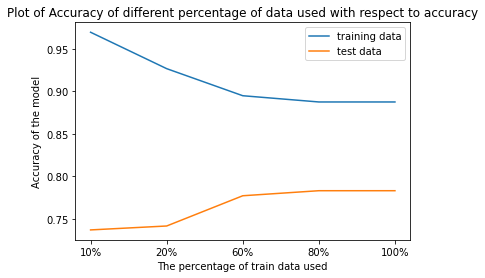

In [271]:
percent_string_vector = ['10%','20%','60%','80%','100%']
plt.xlabel("The percentage of train data used")
plt.ylabel("Accuracy of the model")
plt.title("Plot of Accuracy of different percentage of data used with respect to accuracy")
plt.plot(percent_string_vector, logistic_train_result, label="training data")
plt.plot(percent_string_vector, logistic_test_result, label="test data")
plt.legend(loc='upper right')

In [272]:
test_max = max(logistic_test_result)
test_index = logistic_test_result.index(test_max)
pred_dec = logistic_test_pred[test_index]
print(classification_report(label_te, pred_dec))
print(f'The best accuracy score is: {test_max*100:.2f}%')

              precision    recall  f1-score   support

    negative       0.65      0.78      0.71       516
    positive       0.87      0.78      0.83      1000

    accuracy                           0.78      1516
   macro avg       0.76      0.78      0.77      1516
weighted avg       0.80      0.78      0.79      1516

The best accuracy score is: 78.30%


#### Decision Tree Classifier

In [245]:
features_tr, features_te, label_tr, label_te = rand_split_train_test(features, labels, 0.8, 0)

In [246]:
# We are using CountVectorizer to convert text to a vector of number using the 
# in-built library
cv= CountVectorizer(binary=True,min_df = 10, max_df = 0.95)
cv.fit_transform(features_tr)

# Fitting the data
train_feature_set=cv.transform(features_tr)
test_feature_set=cv.transform(features_te)

In [247]:
# Converting into Tfid Transformer
Tfidf_transformer = TfidfTransformer(use_idf=False)
train_feature_set_tfid = Tfidf_transformer.fit_transform(train_feature_set)
test_feature_set_tfid = Tfidf_transformer.fit_transform(test_feature_set)

In [248]:
percent_vector = [0.1,0.2,0.6,0.8,1]
train_data_features_set = []
train_data_label_set = []

In [249]:
number_of_data = len(features)
for i in range(len(percent_vector)):
    new_number = int(percent_vector[i] * number_of_data)
    new_feature = features_tr[0:new_number]
    train_data_features_set.append(new_feature)
    new_label = label_tr[0:new_number]
    train_data_label_set.append(new_label)
print(len(train_data_features_set[2]))

4546


In [250]:
dt_test_result = []
dt_test_pred = []
dt_train_result = []
dt_train_pred = []

In [251]:
for i in range(len(train_data_features_set)):
    decision_tree_pipeline = Pipeline([("cv", CountVectorizer()),("tfid", TfidfTransformer()), 
                                ("dt", DecisionTreeClassifier(max_depth=10, criterion="gini"))])
    
    decision_tree_pipeline.fit(train_data_features_set[i], train_data_label_set[i])
    
    dt_test_logistic_regression = decision_tree_pipeline.predict(features_te)
    dt_test_pred.append(dt_test_logistic_regression)
    
    dt_train_logistic_regression = decision_tree_pipeline.predict(train_data_features_set[i])
    dt_train_pred.append(dt_train_logistic_regression)
    
    test_acc_dt = accuracy_score(label_te, dt_test_logistic_regression)
    dt_test_result.append(test_acc_dt)
    
    train_acc_dt = accuracy_score(train_data_label_set[i], dt_train_logistic_regression)
    dt_train_result.append(train_acc_dt)

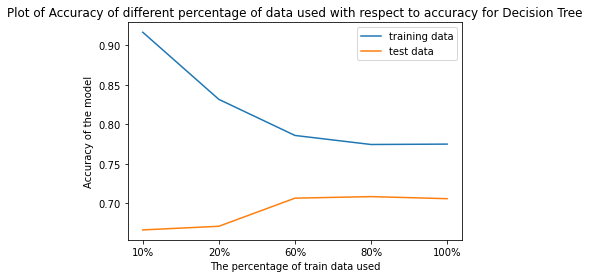

In [252]:
percent_string_vector = ['10%','20%','60%','80%','100%']
plt.xlabel("The percentage of train data used")
plt.ylabel("Accuracy of the model")
plt.title("Plot of Accuracy of different percentage of data used with respect to accuracy for Decision Tree")
plt.plot(percent_string_vector, dt_train_result, label="training data")
plt.plot(percent_string_vector, dt_test_result, label="test data")
plt.legend(loc='upper right')

In [253]:
dt_test_max = max(dt_test_result)
dt_test_index = dt_test_result.index(dt_test_max)
pred_dt = dt_test_pred[dt_test_index]
print(classification_report(label_te, pred_dt))
print(f'The best accuracy score is: {dt_test_max*100:.2f}%')

              precision    recall  f1-score   support

    negative       0.66      0.30      0.41       516
    positive       0.72      0.92      0.81      1000

    accuracy                           0.71      1516
   macro avg       0.69      0.61      0.61      1516
weighted avg       0.70      0.71      0.67      1516

The best accuracy score is: 70.84%


In [254]:
features_tr, features_te, label_tr, label_te = rand_split_train_test(features, labels, 0.8, 10)

In [255]:
# We are using CountVectorizer to convert text to a vector of number using the 
# in-built library
cv= CountVectorizer(binary=True,min_df = 10, max_df = 0.95)
cv.fit_transform(features_tr)

# Fitting the data
train_feature_set=cv.transform(features_tr)
test_feature_set=cv.transform(features_te)

In [256]:
# Converting into Tfid Transformer
Tfidf_transformer = TfidfTransformer(use_idf=False)
train_feature_set_tfid = Tfidf_transformer.fit_transform(train_feature_set)
test_feature_set_tfid = Tfidf_transformer.fit_transform(test_feature_set)

In [257]:
percent_vector = [0.1,0.2,0.6,0.8,1]
train_data_features_set = []
train_data_label_set = []

In [258]:
number_of_data = len(features)
for i in range(len(percent_vector)):
    new_number = int(percent_vector[i] * number_of_data)
    new_feature = features_tr[0:new_number]
    train_data_features_set.append(new_feature)
    new_label = label_tr[0:new_number]
    train_data_label_set.append(new_label)
print(len(train_data_features_set[2]))

4546


In [259]:
boosting_test_result = []
boosting_test_pred = []
boosting_train_result = []
boosting_train_pred = []

In [260]:
for i in range(len(train_data_features_set)):
    boost_pipeline = Pipeline([("cv", CountVectorizer()),("tfid", TfidfTransformer()), 
                                ("adaboost", AdaBoostClassifier(n_estimators=100,learning_rate=0.01, random_state = 1))])
    
    boost_pipeline.fit(train_data_features_set[i], train_data_label_set[i])
    
    boost_test_logistic_regression = boost_pipeline.predict(features_te)
    boosting_test_pred.append(boost_test_logistic_regression)
    
    boost_train_logistic_regression = boost_pipeline.predict(train_data_features_set[i])
    boosting_train_pred.append(boost_train_logistic_regression)
    
    test_acc_boost = accuracy_score(label_te, boost_test_logistic_regression)
    boosting_test_result.append(test_acc_boost)
    
    train_acc_boost = accuracy_score(train_data_label_set[i], boost_train_logistic_regression)
    boosting_train_result.append(train_acc_dt)

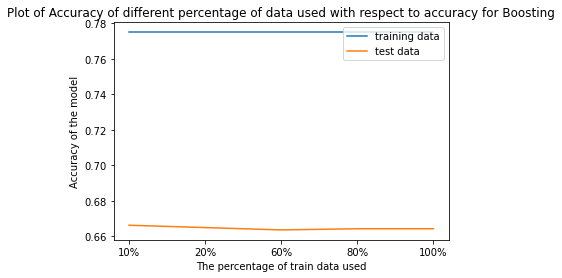

In [261]:
percent_string_vector = ['10%','20%','60%','80%','100%']
plt.xlabel("The percentage of train data used")
plt.ylabel("Accuracy of the model")
plt.title("Plot of Accuracy of different percentage of data used with respect to accuracy for Boosting")
plt.plot(percent_string_vector, boosting_train_result, label="training data")
plt.plot(percent_string_vector, boosting_test_result, label="test data")
plt.legend(loc='upper right')

In [262]:
boost_test_max = max(boosting_test_result)
boost_test_index = boosting_test_result.index(boost_test_max)
pred_boost = boosting_test_pred[boost_test_index]
print(classification_report(label_te, pred_boost))
print(f'The best accuracy score is: {boost_test_max*100:.2f}%')

              precision    recall  f1-score   support

    negative       0.81      0.03      0.05       516
    positive       0.66      1.00      0.80      1000

    accuracy                           0.67      1516
   macro avg       0.74      0.51      0.42      1516
weighted avg       0.71      0.67      0.54      1516

The best accuracy score is: 66.62%


#### Support Vector Machine

In [273]:
svm_test_result = []
svm_test_pred = []
svm_train_result = []
svm_train_pred = []

In [274]:
for i in range(len(train_data_features_set)):    
    svm_pipeline = Pipeline([("cv", CountVectorizer()),("tfid", TfidfTransformer()), 
                             ("sc", SVC(kernel="poly", C=10, class_weight='balanced'))])
    
    svm_pipeline.fit(train_data_features_set[i], train_data_label_set[i])
    
    svm_test_logistic_regression = svm_pipeline.predict(features_te)
    svm_test_pred.append(svm_test_logistic_regression)
    
    svm_train_logistic_regression = svm_pipeline.predict(train_data_features_set[i])
    svm_train_pred.append(svm_train_logistic_regression)
    
    test_acc_svm = accuracy_score(label_te, svm_test_logistic_regression)
    svm_test_result.append(test_acc_svm)
    
    train_acc_svm = accuracy_score(train_data_label_set[i], svm_train_logistic_regression)
    svm_train_result.append(train_acc_svm)

In [275]:
print(svm_test_result)
print()
print(svm_train_result)

[0.6609498680738787, 0.6635883905013192, 0.6807387862796834, 0.6912928759894459, 0.6912928759894459]

[1.0, 1.0, 1.0, 1.0, 1.0]


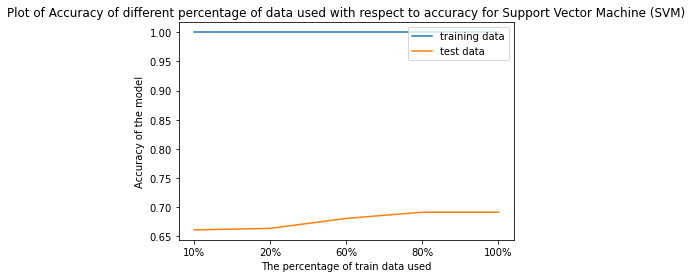

In [276]:
percent_string_vector = ['10%','20%','60%','80%','100%']
plt.xlabel("The percentage of train data used")
plt.ylabel("Accuracy of the model")
plt.title("Plot of Accuracy of different percentage of data used with respect to accuracy for Support Vector Machine (SVM)")
plt.plot(percent_string_vector, svm_train_result, label="training data")
plt.plot(percent_string_vector, svm_test_result, label="test data")
plt.legend(loc='upper right')

In [277]:
svm_test_max = max(svm_test_result)
svm_test_index = svm_test_result.index(svm_test_max)
pred_svm = svm_test_pred[svm_test_index]
print(classification_report(label_te, pred_svm))
print(f'The best accuracy score is: {svm_test_max*100:.2f}%')

              precision    recall  f1-score   support

    negative       0.89      0.11      0.19       516
    positive       0.68      0.99      0.81      1000

    accuracy                           0.69      1516
   macro avg       0.79      0.55      0.50      1516
weighted avg       0.75      0.69      0.60      1516

The best accuracy score is: 69.13%
